<a href="https://colab.research.google.com/github/noushin94/Machine-Learning-Covid19/blob/main/Copy_of_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing all the Libraries

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PowerTransformer
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import missingno as msno
%matplotlib inline

pd.set_option('display.max_columns', 231)

#  2. Downloading and Reading the data

In [99]:
# displaying data
df=pd.read_excel('/content/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')
df

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                            0            1          60th       0   
1                            0            1          60th       0   
2                            0            1          60th       0   
3                            0            1          60th       0   
4                            0            1          60th       0   
...                        ...          ...           ...     ...   
1920                       384            0          50th       1   
1921                       384            0          50th       1   
1922                       384            0          50th       1   
1923                       384            0          50th       1   
1924                       384            0          50th       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                    0.0                 0.0                 0.0   
1                    0.0                 0.0                 0.0   
2                    0.0                 0.0                 0.0   
3                    0.0                 0.0                 0.0   
4                    0.0                 0.0                 0.0   
...                  ...                 ...                 ...   
1920                 0.0                 0.0                 0.0   
1921                 0.0                 0.0                 0.0   
1922                 0.0                 0.0                 0.0   
1923                 0.0                 0.0                 0.0   
1924                 0.0                 0.0                 1.0   

      DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                    0.0                 1.0                 1.0  0.0   
1                    0.0                 1.0                 1.0  0.0   
2                    0.0                 1.0                 1.0  0.0   
3                    0.0                 1.0                 1.0  0.0   
4                    0.0                 1.0                 1.0  0.0   
...                  ...                 ...                 ...  ...   
1920                 0.0                 0.0                 0.0  0.0   
1921                 0.0                 0.0                 0.0  0.0   
1922                 0.0                 0.0                 0.0  0.0   
1923                 0.0                 0.0                 0.0  0.0   
1924                 0.0                 0.0                 0.0  0.0   

      IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
0                   0.0    1.0             NaN           NaN          NaN   
1                   0.0    1.0             NaN           NaN          NaN   
2                   0.0    1.0        0.605263      0.605263     0.605263   
3                   0.0    1.0             NaN           NaN          NaN   
4                   0.0    1.0        0.000000      0.000000     0.000000   
...                 ...    ...             ...           ...          ...   
1920                0.0    1.0             NaN           NaN          NaN   
1921                0.0    1.0        0.605263      0.605263     0.605263   
1922                0.0    1.0             NaN           NaN          NaN   
1923                0.0    1.0             NaN           NaN          NaN   
1924                0.0    1.0        0.605263      0.605263     0.605263   

      ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
0             NaN           NaN                 NaN               NaN   
1             NaN           NaN                 NaN               NaN   
2        0.605263          -1.0           -1.000000         -1.000000   
3             NaN           NaN                 NaN               NaN   
4        0.000000          -1.0           -0.871658         -0.871658   
...           ...           ...                 ...               ...   
1920          NaN           NaN                

In [100]:
# Basic statistics of the dataset
print("\nDataset Statistics:")
print(df.describe())


Dataset Statistics:
       PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65       GENDER  DISEASE GROUPING 1  \
count               1925.000000  1925.000000  1925.000000         1920.000000   
mean                 192.000000     0.467532     0.368831            0.108333   
std                  111.168431     0.499074     0.482613            0.310882   
min                    0.000000     0.000000     0.000000            0.000000   
25%                   96.000000     0.000000     0.000000            0.000000   
50%                  192.000000     0.000000     0.000000            0.000000   
75%                  288.000000     1.000000     1.000000            0.000000   
max                  384.000000     1.000000     1.000000            1.000000   

       DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
count         1920.000000         1920.000000         1920.000000   
mean             0.028125            0.097917            0.019792   
std              0.165373            0.297

In [101]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [102]:
print("Dataset(rows,colums):",df.shape)

Dataset(rows,colums): (1925, 231)


In [103]:
dtypes = df.dtypes.value_counts()
display(dtypes)

float64    225
int64        4
object       2
dtype: int64

In [104]:
df['GENDER']

0       0
1       0
2       0
3       0
4       0
       ..
1920    1
1921    1
1922    1
1923    1
1924    1
Name: GENDER, Length: 1925, dtype: int64

# 3. **Explorartory Data Analysis (EDA)**

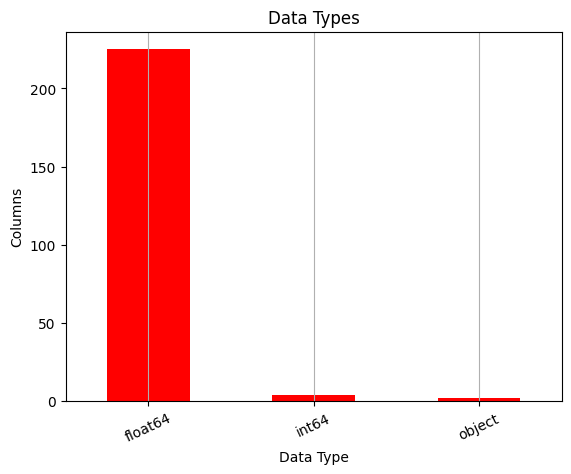

In [105]:
dtypes.plot(kind='bar', color='red')
plt.title('Data Types')
plt.ylabel('Columns')
plt.xlabel('Data Type')
plt.xticks(rotation=25)
plt.grid(axis='x')
plt.show()

**Visualizing missing values**

In [106]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PATIENT_VISIT_IDENTIFIER        0
AGE_ABOVE65                     0
AGE_PERCENTIL                   0
GENDER                          0
DISEASE GROUPING 1              5
                             ... 
RESPIRATORY_RATE_DIFF_REL     748
TEMPERATURE_DIFF_REL          694
OXYGEN_SATURATION_DIFF_REL    686
WINDOW                          0
ICU                             0
Length: 231, dtype: int64


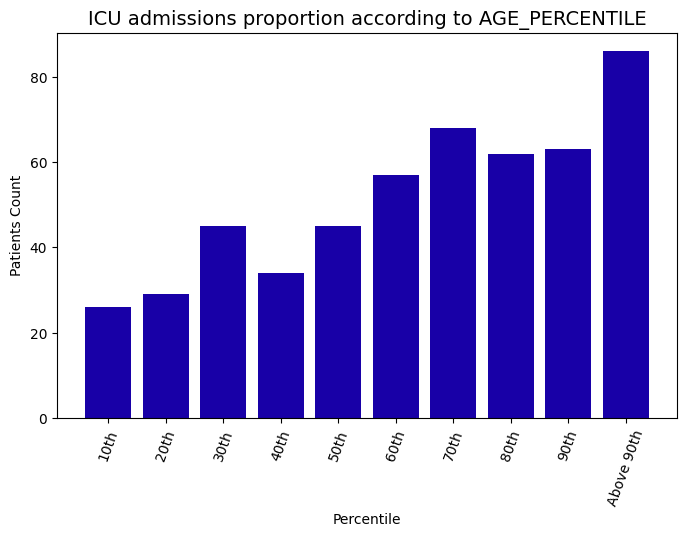

In [107]:
#Age distribution of patients(percentiles) according to ICU admissions
AGE_prop_percentil = df[df['ICU'] == 1]
AGE_prop_percentil = AGE_prop_percentil.groupby('AGE_PERCENTIL')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()
AGE_prop_percentil.head()
plt.figure(figsize=(8,5))
plt.bar(AGE_prop_percentil["AGE_PERCENTIL"],AGE_prop_percentil["PATIENT_VISIT_IDENTIFIER"])
plt.xticks(rotation = 70)
plt.ylabel("Patients Count")
plt.xlabel("Percentile")
plt.title('ICU admissions proportion according to AGE_PERCENTILE', fontdict= {'fontsize' : 14})
plt.show()

It is understood that it is biased towards the age feature.

In [108]:
# Set the size of each individual subplot
subplot_size = (6, 4)

# Calculate the number of rows needed
num_rows = len(df.columns) // 3 + (len(df.columns) % 3 > 0)

# Set the size of the entire figure
figure_size = (18, 4 * num_rows)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, 3, figsize=figure_size)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each feature on a separate subplot
for i, feature in enumerate(df.columns):
    axes[i].hist(df[feature])
    axes[i].set_title(feature)

# Hide any remaining empty subplots
for i in range(len(df.columns), num_rows * 3):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


we can see there are skewness in some features


In [109]:
df=df.replace(-1,np.nan)

In [110]:
# Print total number of NaN values
print('NaN values =', df.isnull().sum().sum())
print("\n")

missing_var = []

for feature in df.columns:
    miss = df[feature].isna().sum()
    if miss > 0:
        missing_var.append(feature)
        missing_val = miss / df.shape[0]
        print('The feature {} has {} records ({:.2%}) with missing values.'.format(feature, miss, missing_val))

print('There are {} features with missing values'.format(len(missing_var)))

NaN values = 269664


The feature DISEASE GROUPING 1 has 5 records (0.26%) with missing values.
The feature DISEASE GROUPING 2 has 5 records (0.26%) with missing values.
The feature DISEASE GROUPING 3 has 5 records (0.26%) with missing values.
The feature DISEASE GROUPING 4 has 5 records (0.26%) with missing values.
The feature DISEASE GROUPING 5 has 5 records (0.26%) with missing values.
The feature DISEASE GROUPING 6 has 5 records (0.26%) with missing values.
The feature HTN has 5 records (0.26%) with missing values.
The feature IMMUNOCOMPROMISED has 5 records (0.26%) with missing values.
The feature OTHER has 5 records (0.26%) with missing values.
The feature ALBUMIN_MEDIAN has 1104 records (57.35%) with missing values.
The feature ALBUMIN_MEAN has 1104 records (57.35%) with missing values.
The feature ALBUMIN_MIN has 1104 records (57.35%) with missing values.
The feature ALBUMIN_MAX has 1104 records (57.35%) with missing values.
The feature ALBUMIN_DIFF has 1925 records (100.00%) w

In [111]:
# Calculate the percentage of missing values for each feature
missing_percentage = df.isnull().mean() * 100

# Filter the features with more than 50% missing values
features_with_many_missing = missing_percentage[missing_percentage > 50]

# Enumerate and display each feature with its corresponding percentage of missing values
for idx, (feature, percentage) in enumerate(features_with_many_missing.items(), 1):
    print(f"{idx}. Feature {feature} is missing {percentage:.2f}% of its values")

1. Feature ALBUMIN_MEDIAN is missing 57.35% of its values
2. Feature ALBUMIN_MEAN is missing 57.35% of its values
3. Feature ALBUMIN_MIN is missing 57.35% of its values
4. Feature ALBUMIN_MAX is missing 57.35% of its values
5. Feature ALBUMIN_DIFF is missing 100.00% of its values
6. Feature BE_ARTERIAL_MEDIAN is missing 96.10% of its values
7. Feature BE_ARTERIAL_MEAN is missing 96.10% of its values
8. Feature BE_ARTERIAL_MIN is missing 96.10% of its values
9. Feature BE_ARTERIAL_MAX is missing 96.10% of its values
10. Feature BE_ARTERIAL_DIFF is missing 100.00% of its values
11. Feature BE_VENOUS_MEDIAN is missing 87.64% of its values
12. Feature BE_VENOUS_MEAN is missing 87.64% of its values
13. Feature BE_VENOUS_MIN is missing 87.64% of its values
14. Feature BE_VENOUS_MAX is missing 87.64% of its values
15. Feature BE_VENOUS_DIFF is missing 100.00% of its values
16. Feature BIC_ARTERIAL_MEDIAN is missing 57.40% of its values
17. Feature BIC_ARTERIAL_MEAN is missing 57.40% of its va

<Axes: >

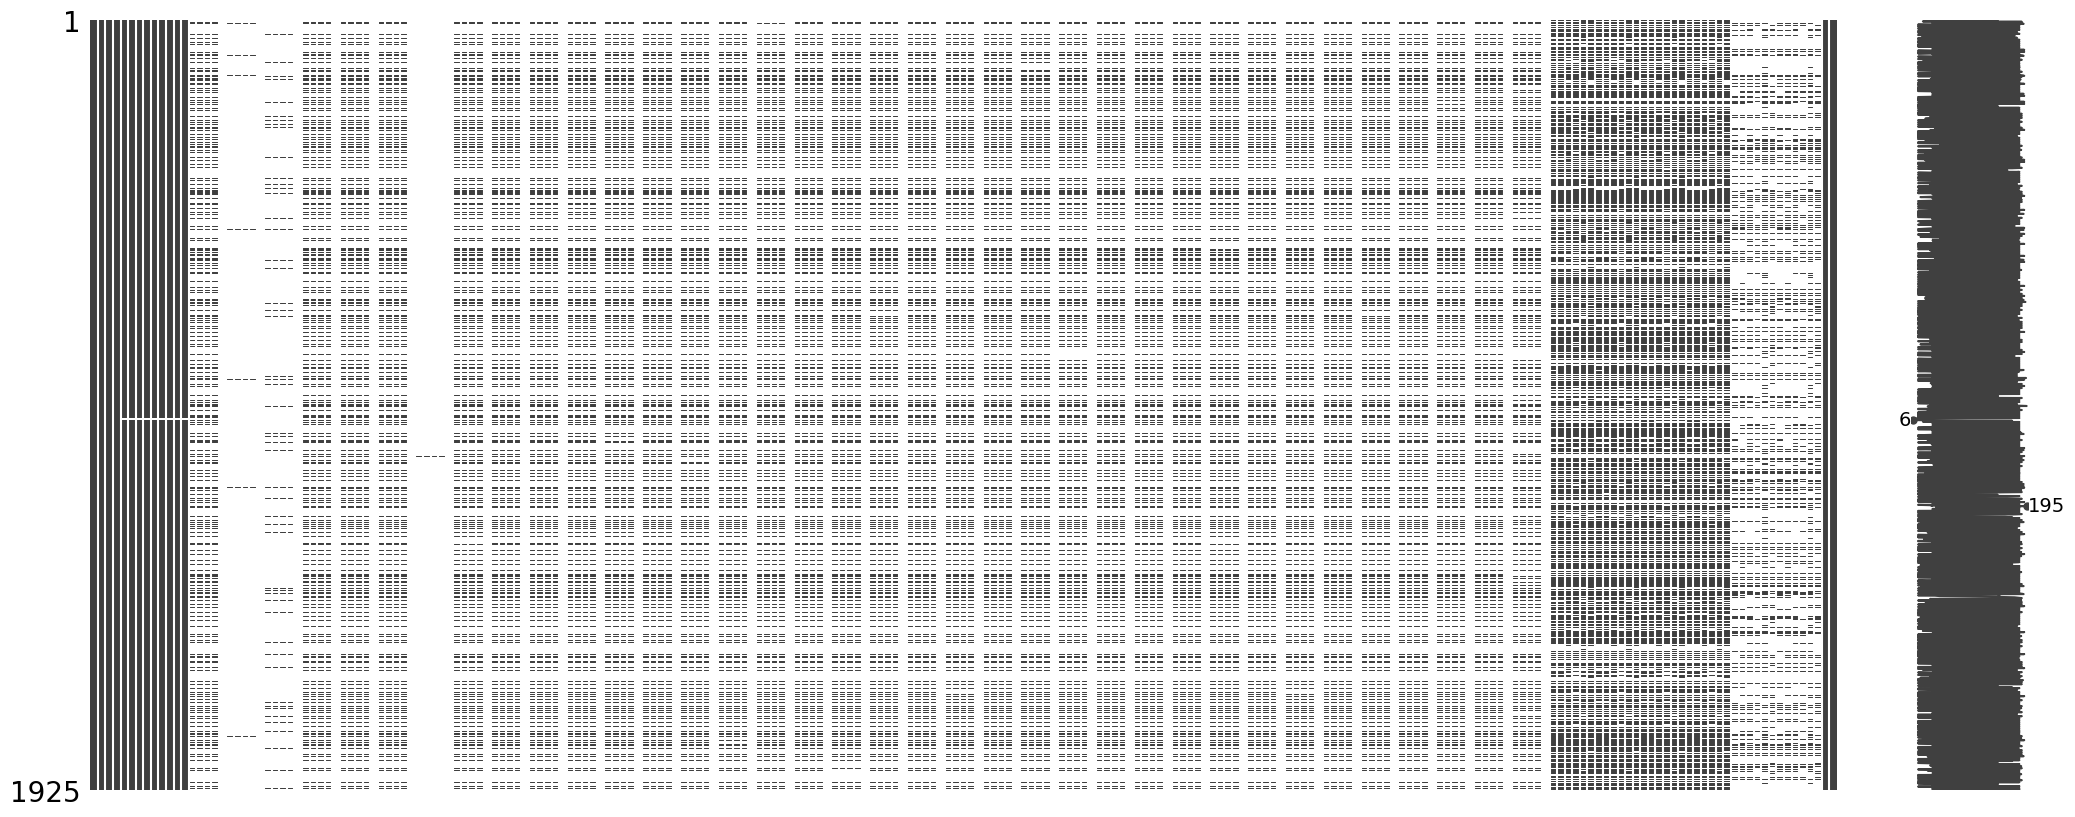

In [112]:
%matplotlib inline
msno.matrix(df)

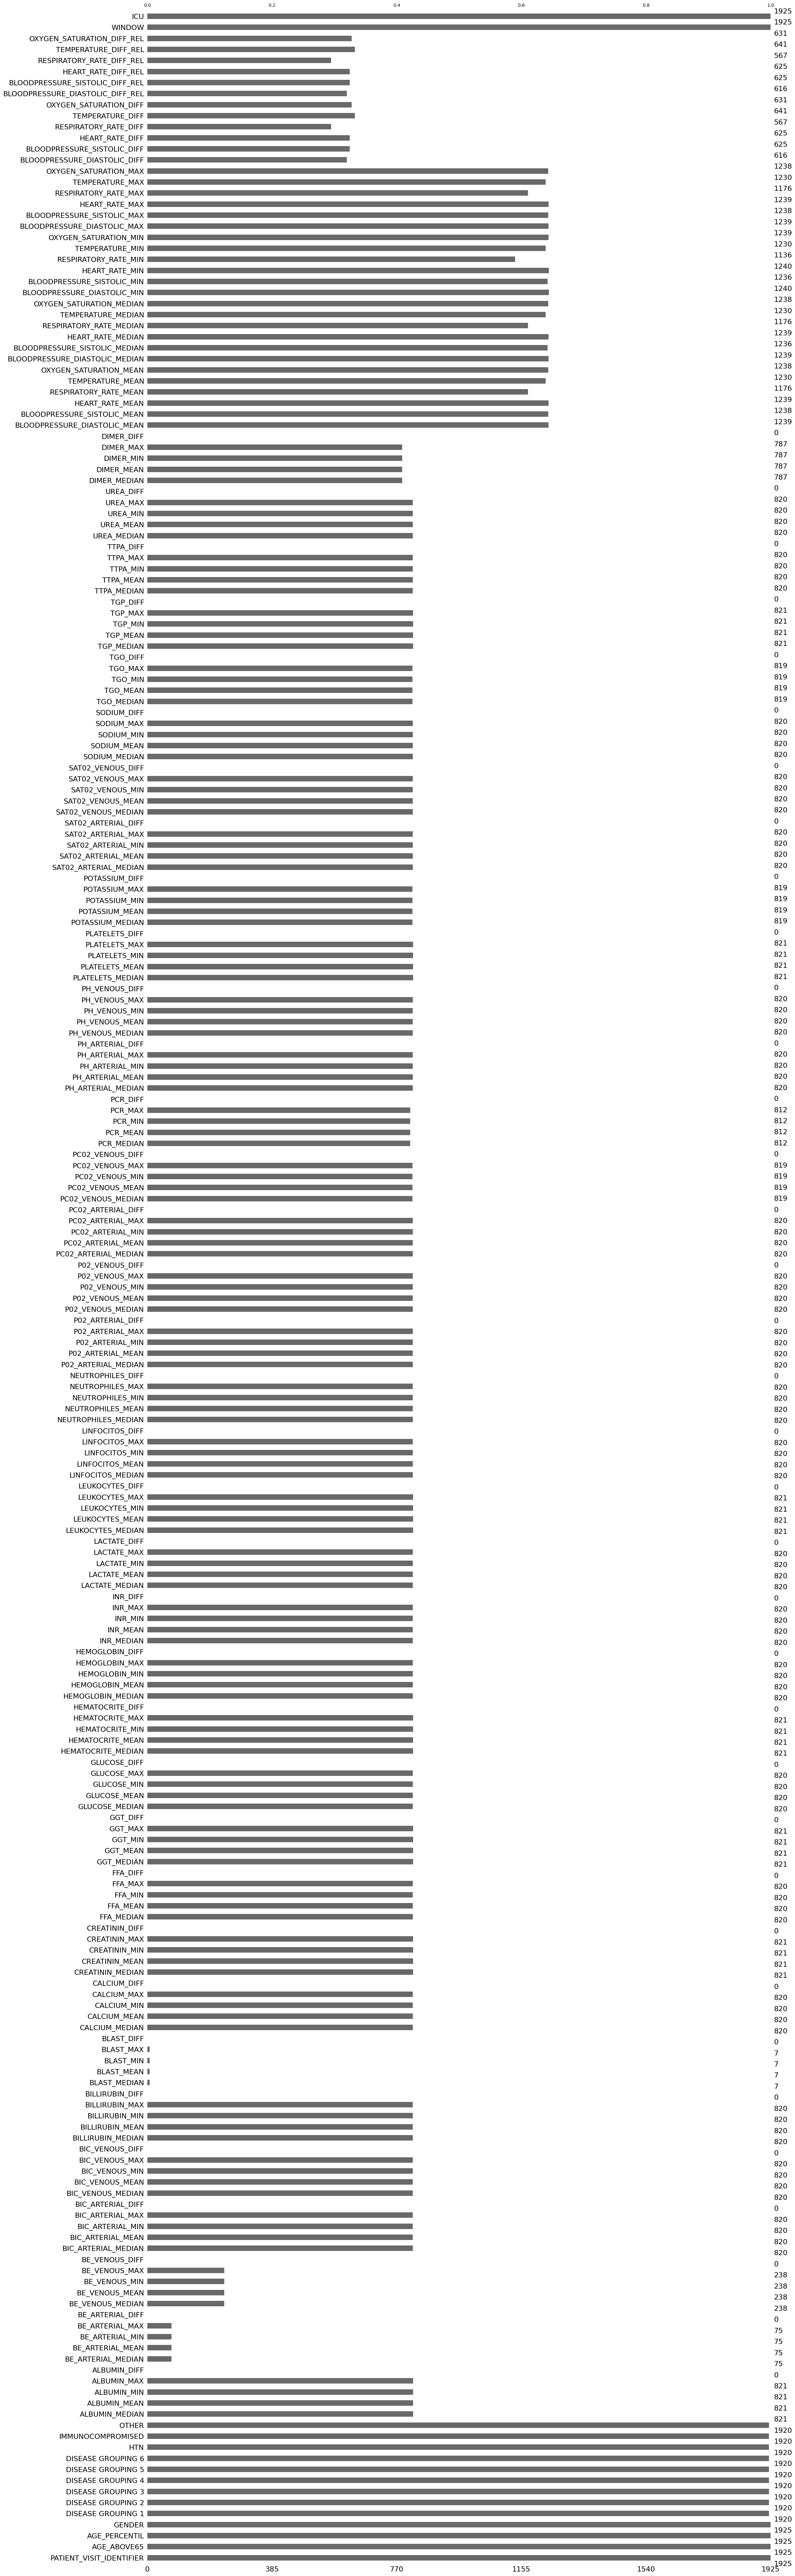

In [113]:
msno.bar(df);

In [114]:
threshold = 0.5 * len(df)
df_cleaned = df.dropna(axis=1, thresh=threshold)

# Print the columns in the cleaned DataFrame
print("Remaining columns after dropping values with more than 50% missing values:")
print(df_cleaned.columns)

Remaining columns after dropping values with more than 50% missing values:
Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN',
       'IMMUNOCOMPROMISED', 'OTHER', 'BLOODPRESSURE_DIASTOLIC_MEAN',
       'BLOODPRESSURE_SISTOLIC_MEAN', 'HEART_RATE_MEAN',
       'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN',
       'BLOODPRESSURE_DIASTOLIC_MEDIAN', 'BLOODPRESSURE_SISTOLIC_MEDIAN',
       'HEART_RATE_MEDIAN', 'RESPIRATORY_RATE_MEDIAN', 'TEMPERATURE_MEDIAN',
       'OXYGEN_SATURATION_MEDIAN', 'BLOODPRESSURE_DIASTOLIC_MIN',
       'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN',
       'TEMPERATURE_MIN', 'OXYGEN_SATURATION_MIN',
       'BLOODPRESSURE_DIASTOLIC_MAX', 'BLOODPRESSURE_SISTOLIC_MAX',
       'HEART_RATE_MAX', 'RESPIRATORY_RATE_MAX', 'TEMPERATURE_MAX',
       '

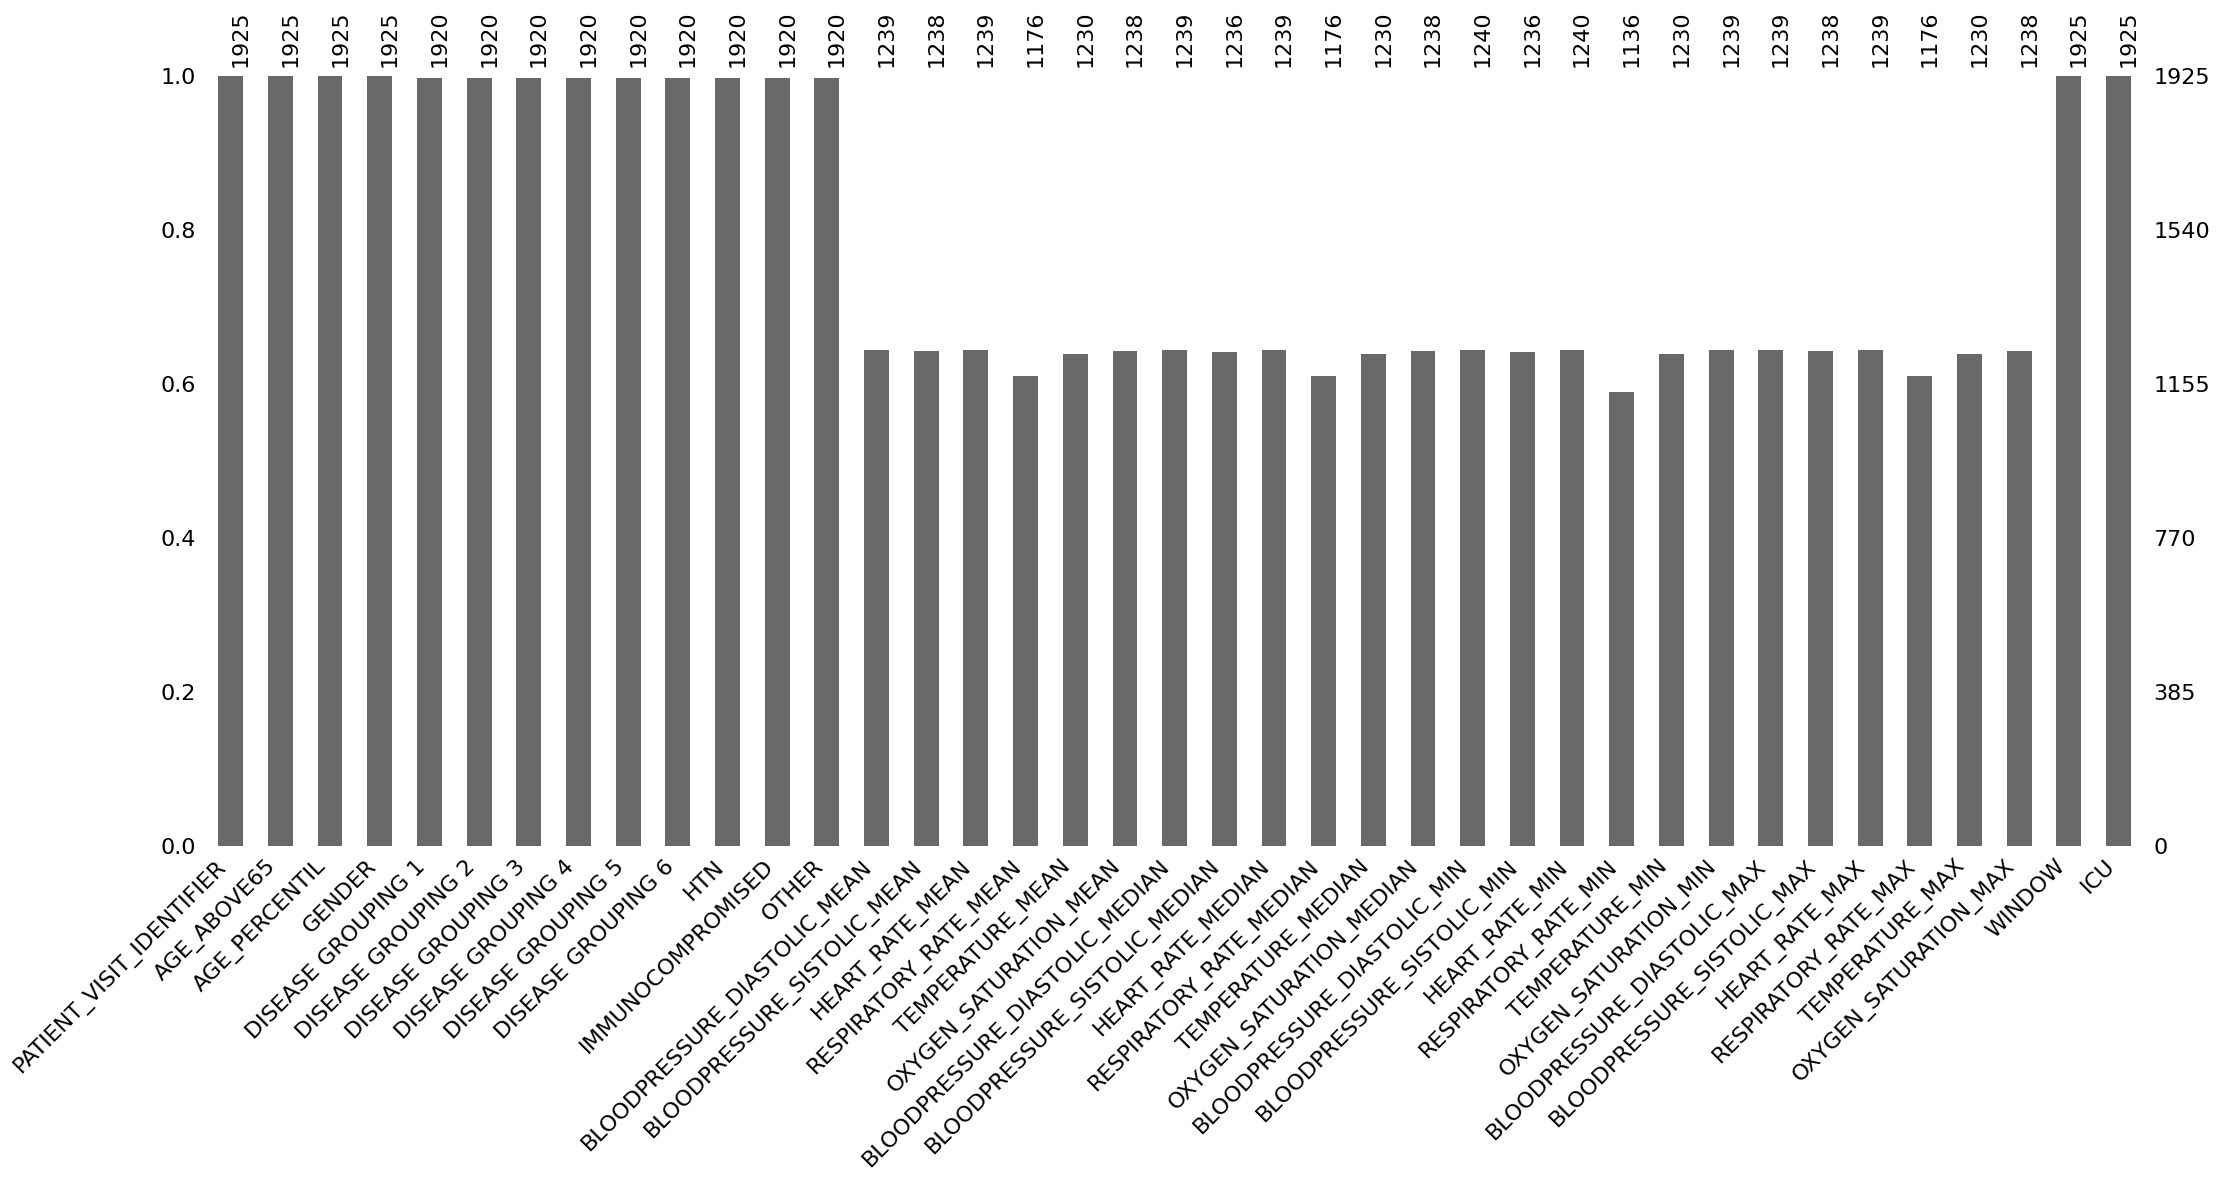

In [115]:
msno.bar(df_cleaned)

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

# Show the plot
plt.show()

<Axes: >

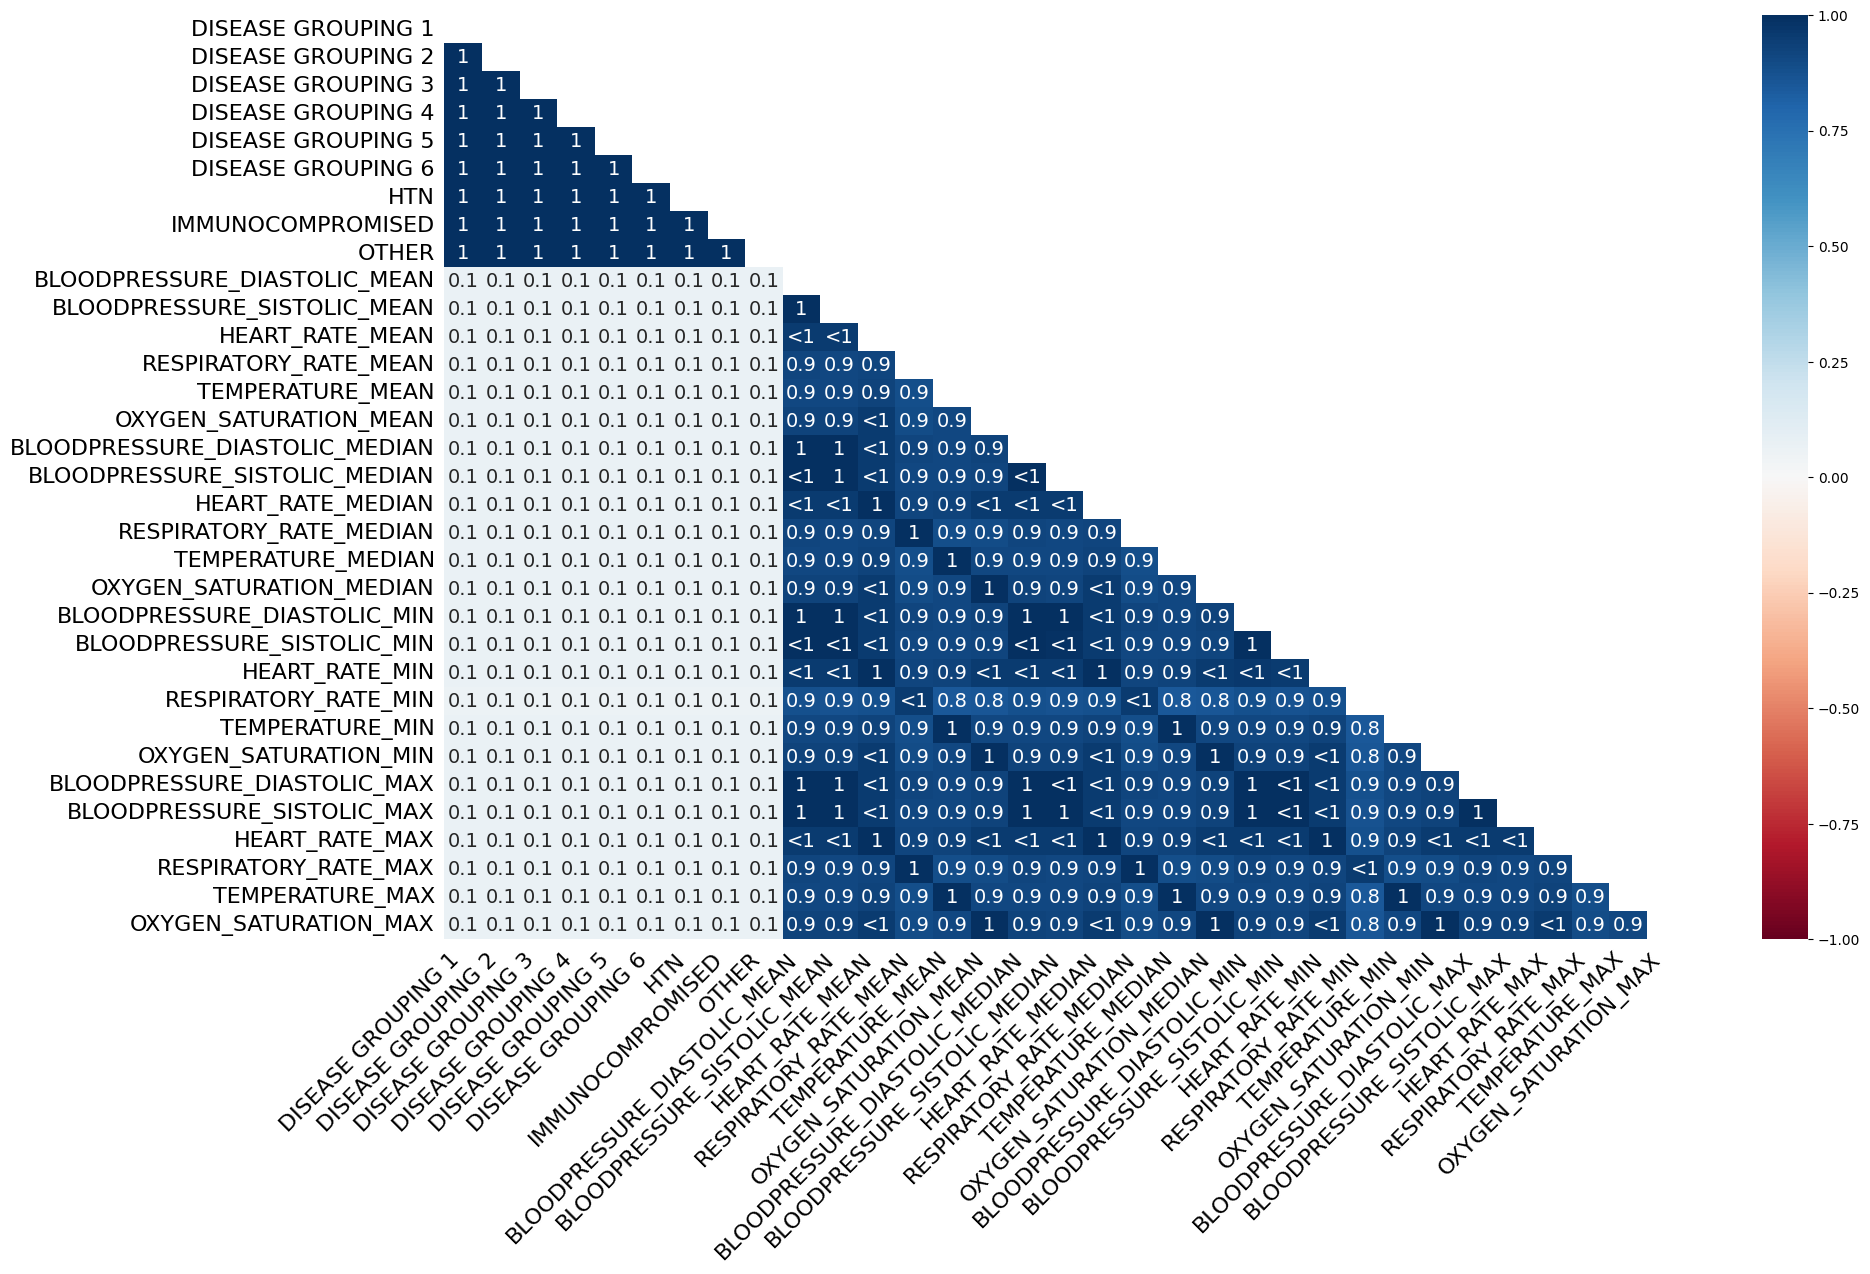

In [116]:
msno.heatmap(df_cleaned)
#msno.heatmap() provides a visual representation for creating a heatmap of missing data patterns in a Pandas DataFrame using the'missingno' module.

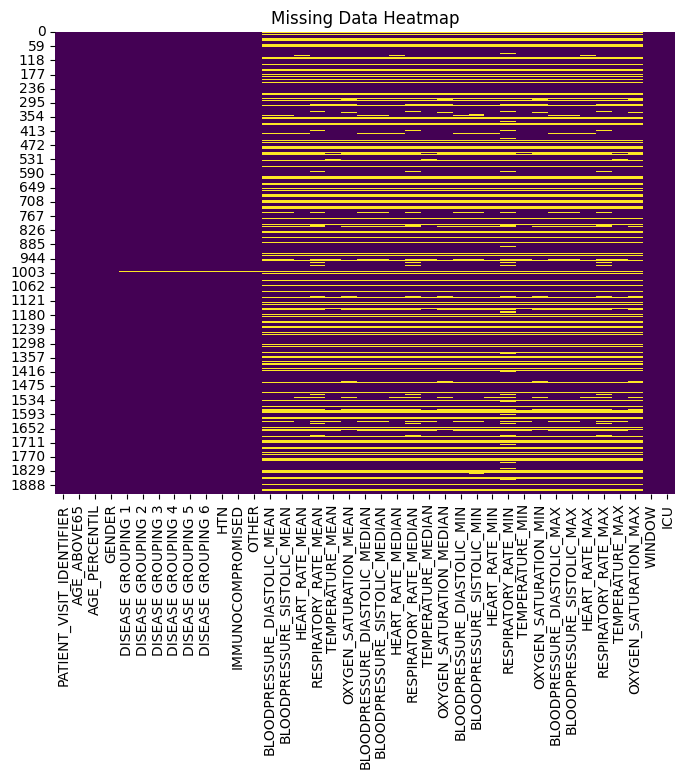

In [117]:
#To understand the msno.heatmap() more clearly and making it more visually appealing
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis', ax=ax)
ax.set_title('Missing Data Heatmap')
plt.show()

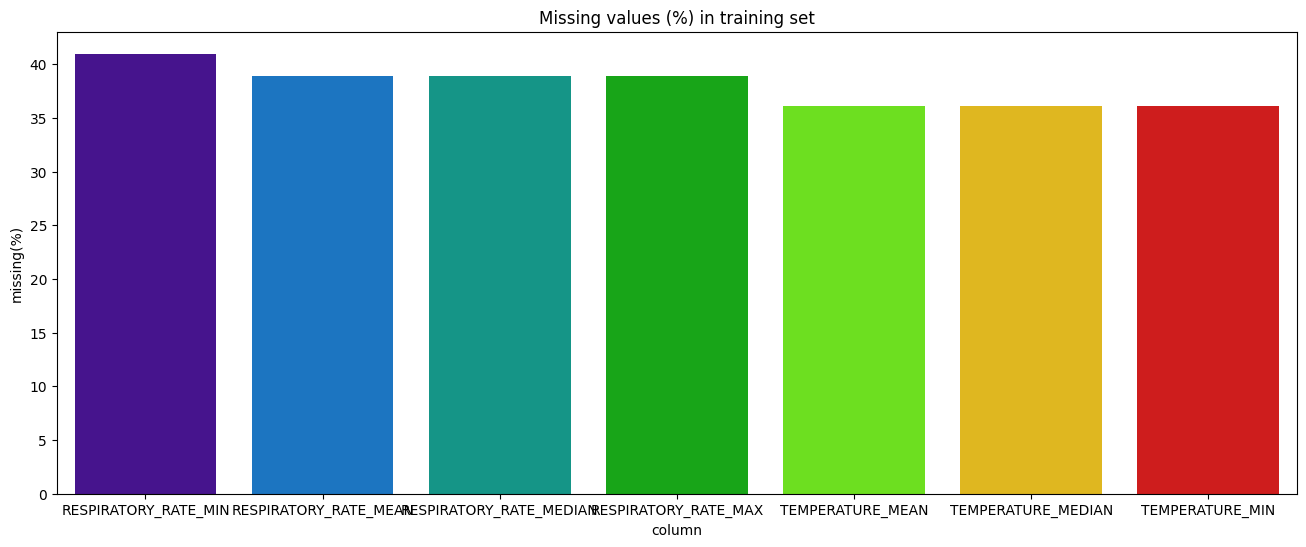

In [118]:
df_missing = pd.DataFrame({'column':df_cleaned.columns, 'missing(%)':((df_cleaned.isna()).sum()/df_cleaned.shape[0])*100})

df_missings = df_missing.nlargest(7, 'missing(%)')

sns.set_palette(sns.color_palette('nipy_spectral'))

plt.figure(figsize=(16,6))
sns.barplot(data= df_missings, x='column', y='missing(%)',palette='nipy_spectral')
plt.title('Missing values (%) in training set')
plt.show()


In summary, this bar plot visually represent the percentage of missing values for the top 7 columns with the highest percentage of missing values in the df_cleaned

In [119]:
df.ICU.value_counts() # imbalanced

0    1410
1     515
Name: ICU, dtype: int64

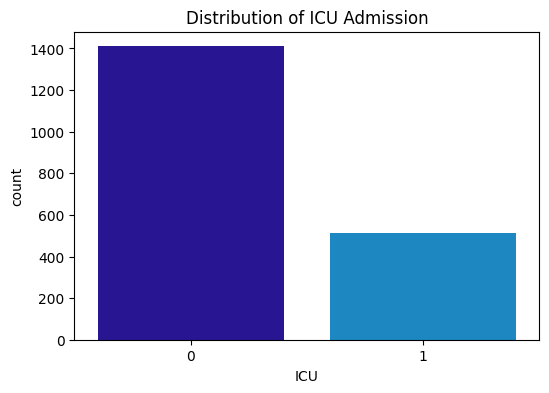

In [120]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='ICU', data=df)
plt.title('Distribution of ICU Admission')
plt.show()

The graph shows the distribution of target variable in the dataset. the 0 represents the patients not admitted in the ICU and 1 represents the patients admitted in the ICU

In [121]:
icu_data = df.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False).agg({"ICU":list, "WINDOW":list})
icu_data.head(15)

PATIENT_VISIT_IDENTIFIER              ICU                           WINDOW
0                          0  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
1                          1  [1, 1, 1, 1, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
2                          2  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
3                          3  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
4                          4  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
5                          5  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
6                          6  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
7                          7  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
8                          8  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
9                          9  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
10                        10  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
11                        11  [0, 0, 0, 1, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
12                        12  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
13                        13  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
14                        14  [0, 0, 1, 1, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]

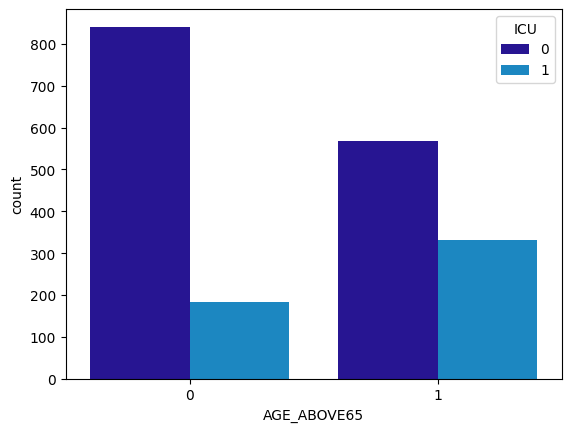

In [122]:
sns.set_color_codes("pastel")
ax = sns.countplot(x="AGE_ABOVE65", hue="ICU", data=df)

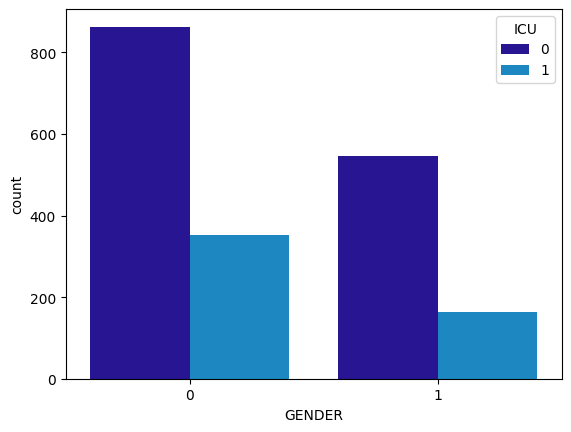

In [123]:
ax = sns.countplot(x="GENDER", hue="ICU", data=df)

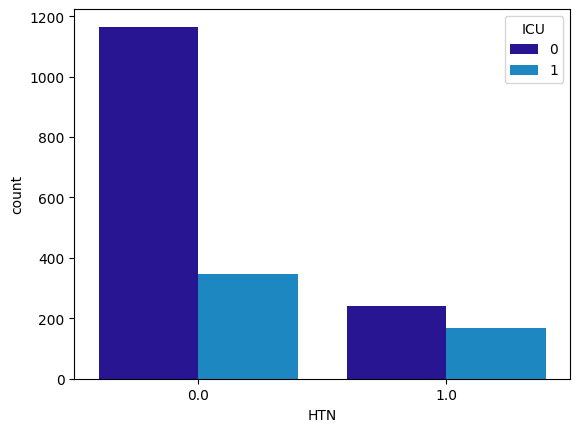

In [124]:
ax = sns.countplot(x="HTN", hue="ICU", data=df)

<Axes: xlabel='IMMUNOCOMPROMISED', ylabel='count'>

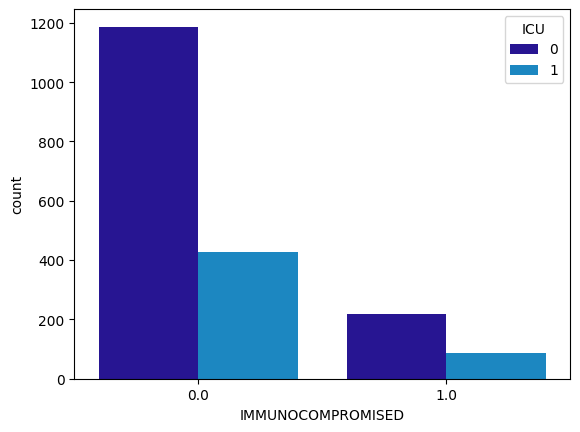

In [125]:
sns.countplot(x="IMMUNOCOMPROMISED", hue="ICU", data=df)

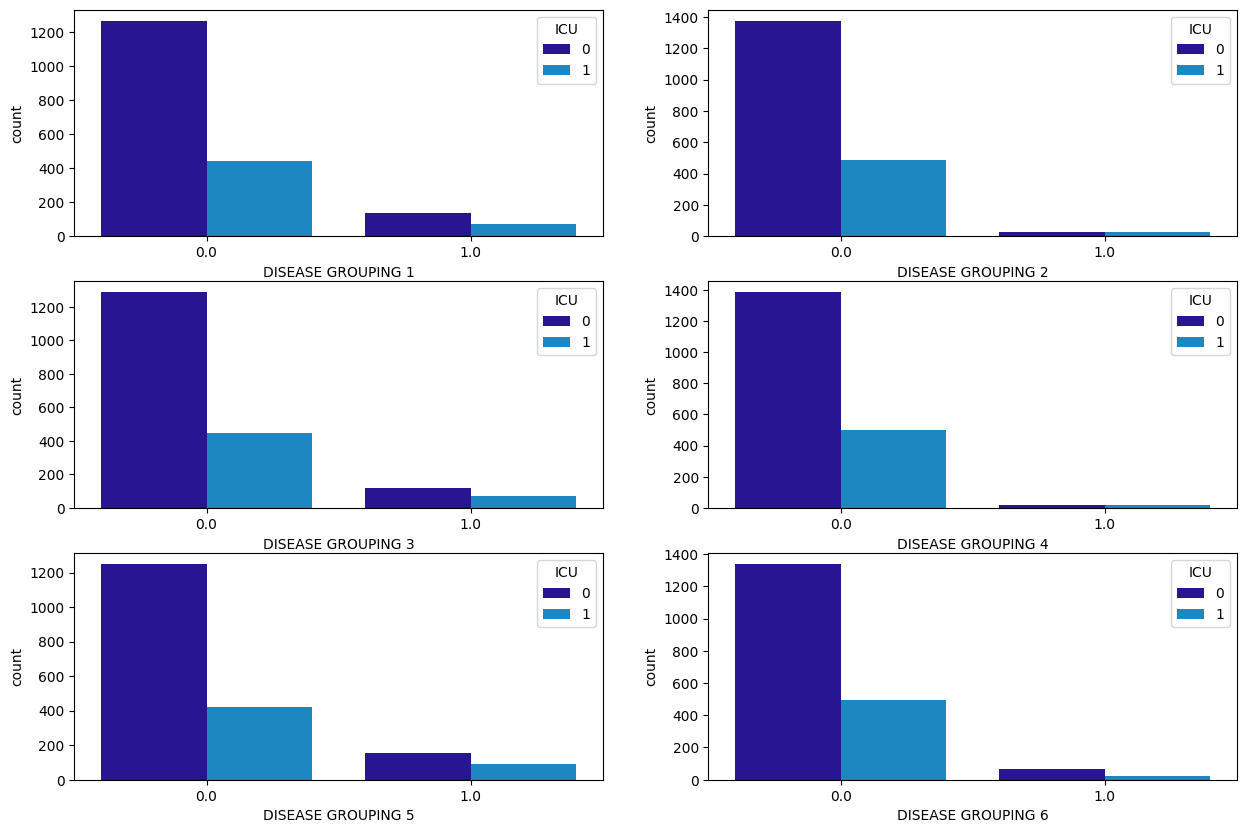

In [126]:
disease_grp = ['DISEASE GROUPING 1','DISEASE GROUPING 2','DISEASE GROUPING 3',
               'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6']

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(15,10))
col = 0

for i in range(len(disease_grp)):
    sns.countplot(x=disease_grp[i], hue="ICU", data=df, ax = axes[int((i)/2)][col])
    col = (col+1) % 2

<Axes: >

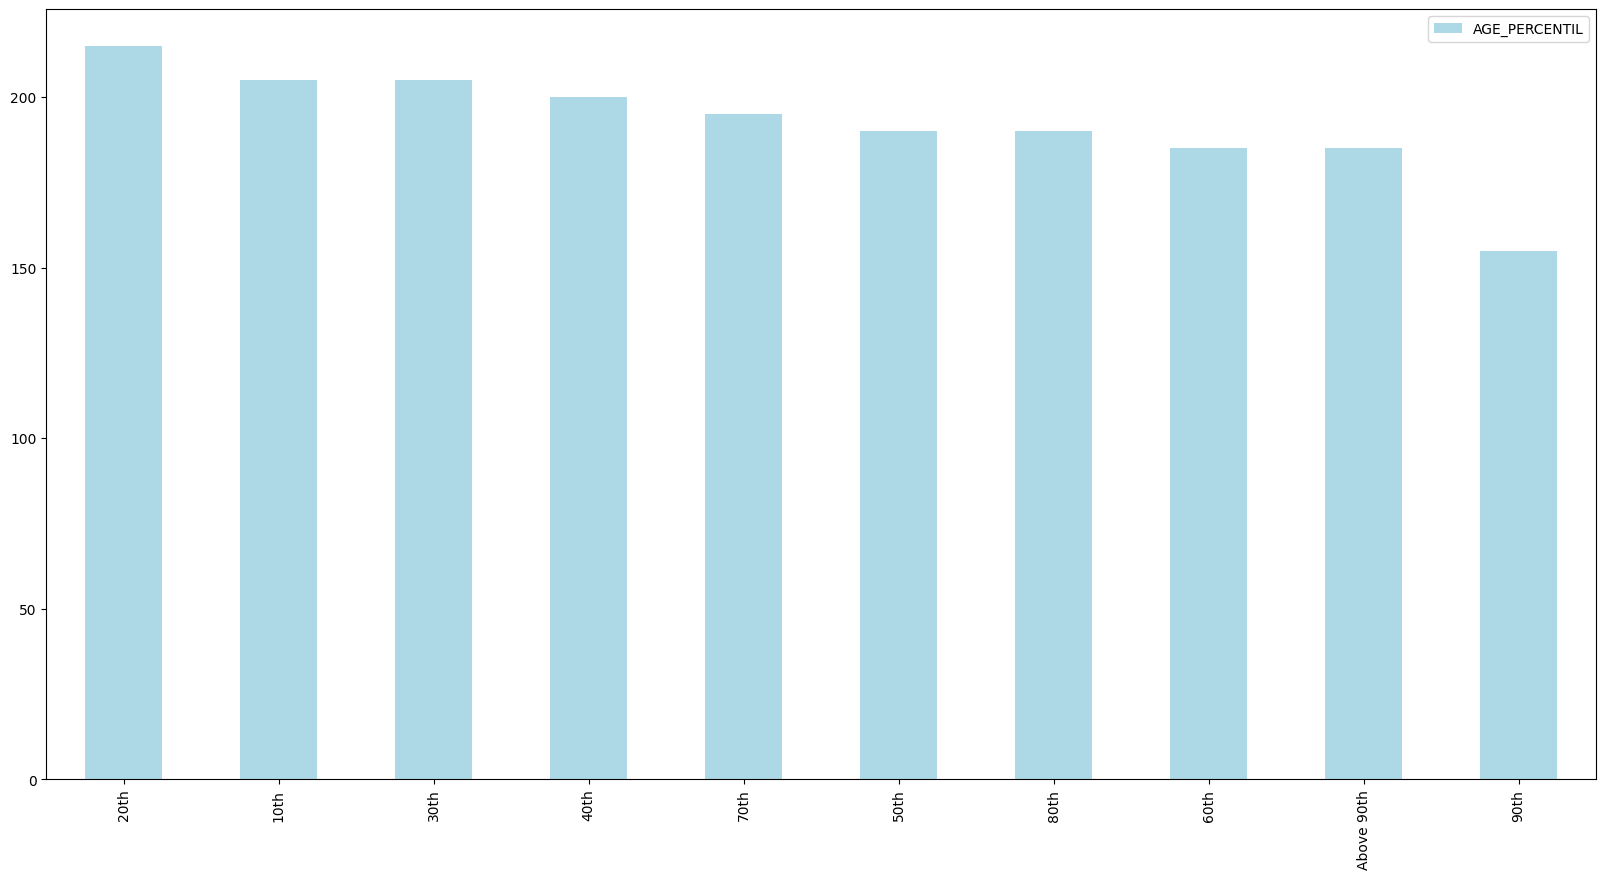

In [127]:
pd.DataFrame(df['AGE_PERCENTIL'].value_counts()).plot(kind='bar', figsize=(20,10),color="lightblue")

In [128]:
vital = df.columns[13:]
vital_df = df[vital]
vital_df.drop(columns = ["WINDOW"],inplace=True)

<ipython-input-128-7e5034b3f60a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vital_df.drop(columns = ["WINDOW"],inplace=True)


In [129]:
vital = list(vital)
vital.remove("WINDOW")

In [130]:
vital

['ALBUMIN_MEDIAN',
 'ALBUMIN_MEAN',
 'ALBUMIN_MIN',
 'ALBUMIN_MAX',
 'ALBUMIN_DIFF',
 'BE_ARTERIAL_MEDIAN',
 'BE_ARTERIAL_MEAN',
 'BE_ARTERIAL_MIN',
 'BE_ARTERIAL_MAX',
 'BE_ARTERIAL_DIFF',
 'BE_VENOUS_MEDIAN',
 'BE_VENOUS_MEAN',
 'BE_VENOUS_MIN',
 'BE_VENOUS_MAX',
 'BE_VENOUS_DIFF',
 'BIC_ARTERIAL_MEDIAN',
 'BIC_ARTERIAL_MEAN',
 'BIC_ARTERIAL_MIN',
 'BIC_ARTERIAL_MAX',
 'BIC_ARTERIAL_DIFF',
 'BIC_VENOUS_MEDIAN',
 'BIC_VENOUS_MEAN',
 'BIC_VENOUS_MIN',
 'BIC_VENOUS_MAX',
 'BIC_VENOUS_DIFF',
 'BILLIRUBIN_MEDIAN',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MIN',
 'BILLIRUBIN_MAX',
 'BILLIRUBIN_DIFF',
 'BLAST_MEDIAN',
 'BLAST_MEAN',
 'BLAST_MIN',
 'BLAST_MAX',
 'BLAST_DIFF',
 'CALCIUM_MEDIAN',
 'CALCIUM_MEAN',
 'CALCIUM_MIN',
 'CALCIUM_MAX',
 'CALCIUM_DIFF',
 'CREATININ_MEDIAN',
 'CREATININ_MEAN',
 'CREATININ_MIN',
 'CREATININ_MAX',
 'CREATININ_DIFF',
 'FFA_MEDIAN',
 'FFA_MEAN',
 'FFA_MIN',
 'FFA_MAX',
 'FFA_DIFF',
 'GGT_MEDIAN',
 'GGT_MEAN',
 'GGT_MIN',
 'GGT_MAX',
 'GGT_DIFF',
 'GLUCOSE_MEDIAN',
 

In [131]:
vital_df

ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  ALBUMIN_MAX  ALBUMIN_DIFF  \
0                NaN           NaN          NaN          NaN           NaN   
1                NaN           NaN          NaN          NaN           NaN   
2           0.605263      0.605263     0.605263     0.605263           NaN   
3                NaN           NaN          NaN          NaN           NaN   
4           0.000000      0.000000     0.000000     0.000000           NaN   
...              ...           ...          ...          ...           ...   
1920             NaN           NaN          NaN          NaN           NaN   
1921        0.605263      0.605263     0.605263     0.605263           NaN   
1922             NaN           NaN          NaN          NaN           NaN   
1923             NaN           NaN          NaN          NaN           NaN   
1924        0.605263      0.605263     0.605263     0.605263           NaN   

      BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  \
0                    NaN               NaN              NaN              NaN   
1                    NaN               NaN              NaN              NaN   
2                    NaN               NaN              NaN              NaN   
3                    NaN               NaN              NaN              NaN   
4              -0.871658         -0.871658        -0.871658        -0.871658   
...                  ...               ...              ...              ...   
1920                 NaN               NaN              NaN              NaN   
1921                 NaN               NaN              NaN              NaN   
1922                 NaN               NaN              NaN              NaN   
1923                 NaN               NaN              NaN              NaN   
1924                 NaN               NaN              NaN              NaN   

      BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  BE_VENOUS_MEAN  BE_VENOUS_MIN  \
0                  NaN               NaN             NaN            NaN   
1                  NaN               NaN             NaN            NaN   
2                  NaN               NaN             NaN            NaN   
3                  NaN               NaN             NaN            NaN   
4                  NaN         -0.863874       -0.863874      -0.863874   
...                ...               ...             ...            ...   
1920               NaN               NaN             NaN            NaN   
1921               NaN         -0.717277       -0.717277      -0.717277   
1922               NaN               NaN             NaN            NaN   
1923               NaN               NaN             NaN            NaN   
1924               NaN               NaN             NaN            NaN   

      BE_VENOUS_MAX  BE_VENOUS_DIFF  BIC_ARTERIAL_MEDIAN  BIC_ARTERIAL_MEAN  \
0               NaN             NaN                  NaN                NaN   
1               NaN             NaN                  NaN                NaN   
2               NaN             NaN            -0.317073          -0.317073   
3               NaN             NaN                  NaN                NaN   
4         -0.863874             NaN            -0.317073          -0.317073   
...             ...             ...                  ...                ...   
1920            NaN             NaN                  NaN                NaN   
1921      -0.717277             NaN            -0.317073          -0.317073   
1922            NaN             NaN                  NaN                NaN   
1923            NaN             NaN                  NaN                NaN   
1924            NaN             NaN            -0.317073          -0.317073   

      BIC_ARTERIAL_MIN  BIC_ARTERIAL_MAX  BIC_ARTERIAL_DIFF  \
0                  NaN               NaN                NaN   
1                  NaN               NaN                NaN   
2            -0.317073         -0.317073                NaN   
3     

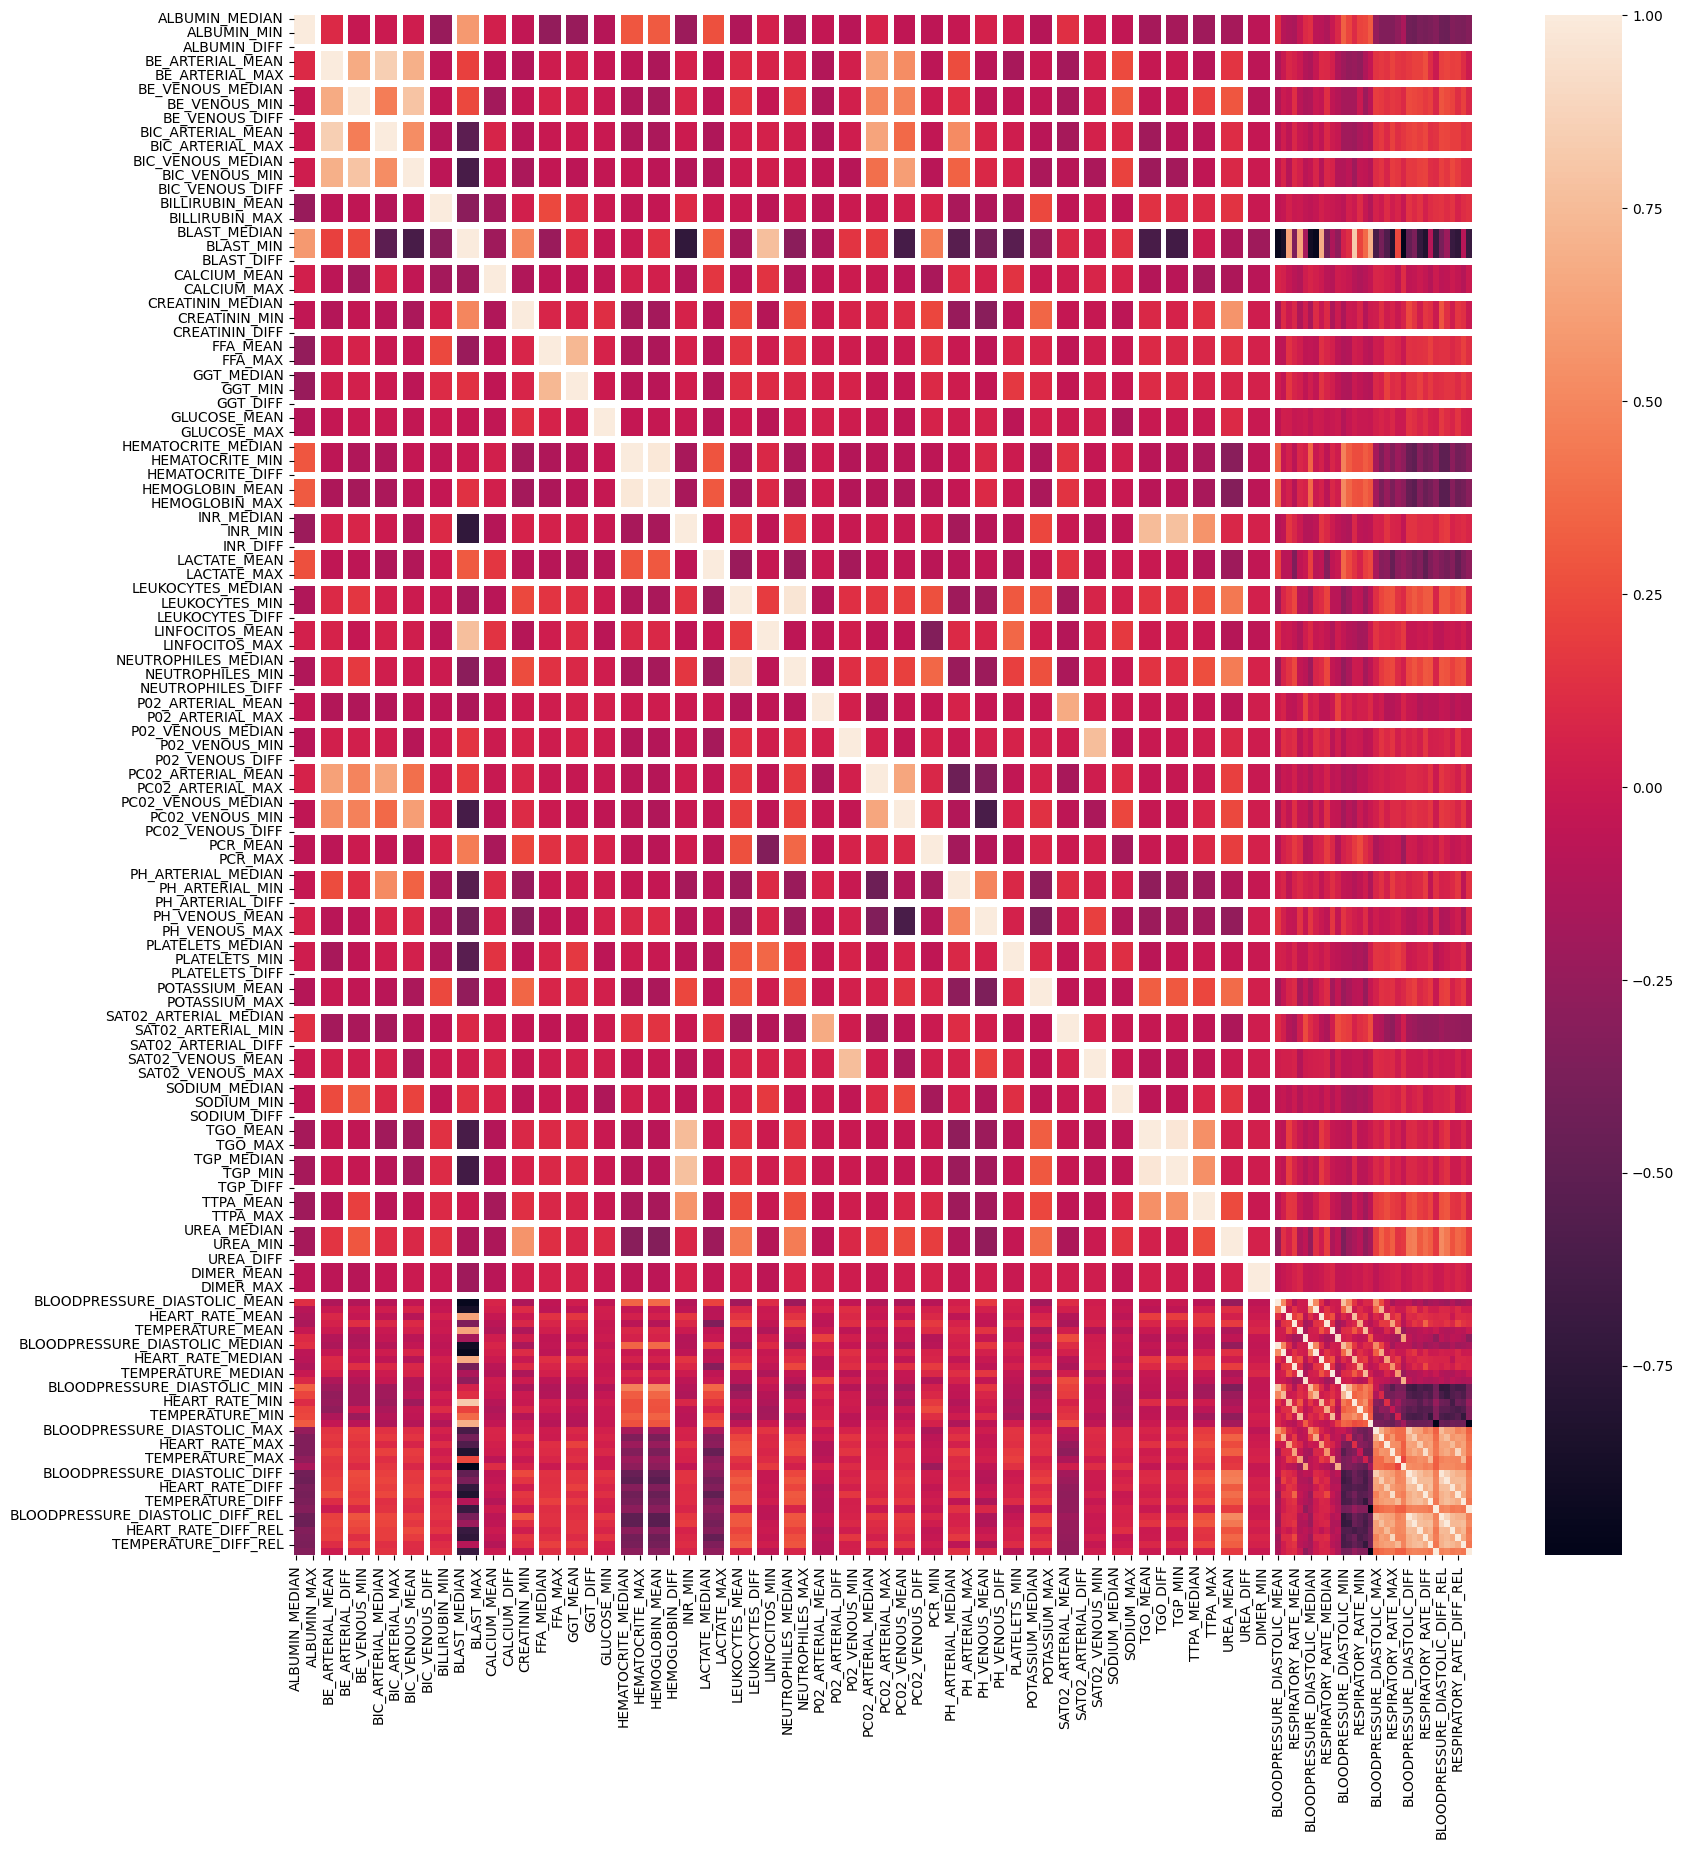

In [132]:
f,ax = plt.subplots(figsize=(19,20))
sns.heatmap(vital_df.drop(columns=['ICU']).corr())
plt.show()

In [133]:
rows_list = []
for f in vital:
    v1 = vital_df[ vital_df['ICU']==1 ][f].var()
    v0 = vital_df[ vital_df['ICU']==0 ][f].var()
    dictionary = {
        'feature' : f,
        'icu' : v1,
        'non-icu' : v0
    }
    rows_list.append(dictionary)

vital_signs = pd.DataFrame(rows_list)

In [134]:
vital_signs

feature       icu   non-icu
0                ALBUMIN_MEDIAN  0.102375  0.016011
1                  ALBUMIN_MEAN  0.102375  0.016011
2                   ALBUMIN_MIN  0.102375  0.016011
3                   ALBUMIN_MAX  0.102375  0.016011
4                  ALBUMIN_DIFF       NaN       NaN
..                          ...       ...       ...
212         HEART_RATE_DIFF_REL  0.112769  0.035300
213   RESPIRATORY_RATE_DIFF_REL  0.270141  0.044917
214        TEMPERATURE_DIFF_REL  0.129324  0.057729
215  OXYGEN_SATURATION_DIFF_REL  0.235693  0.054185
216                         ICU  0.000000  0.000000

[217 rows x 3 columns]

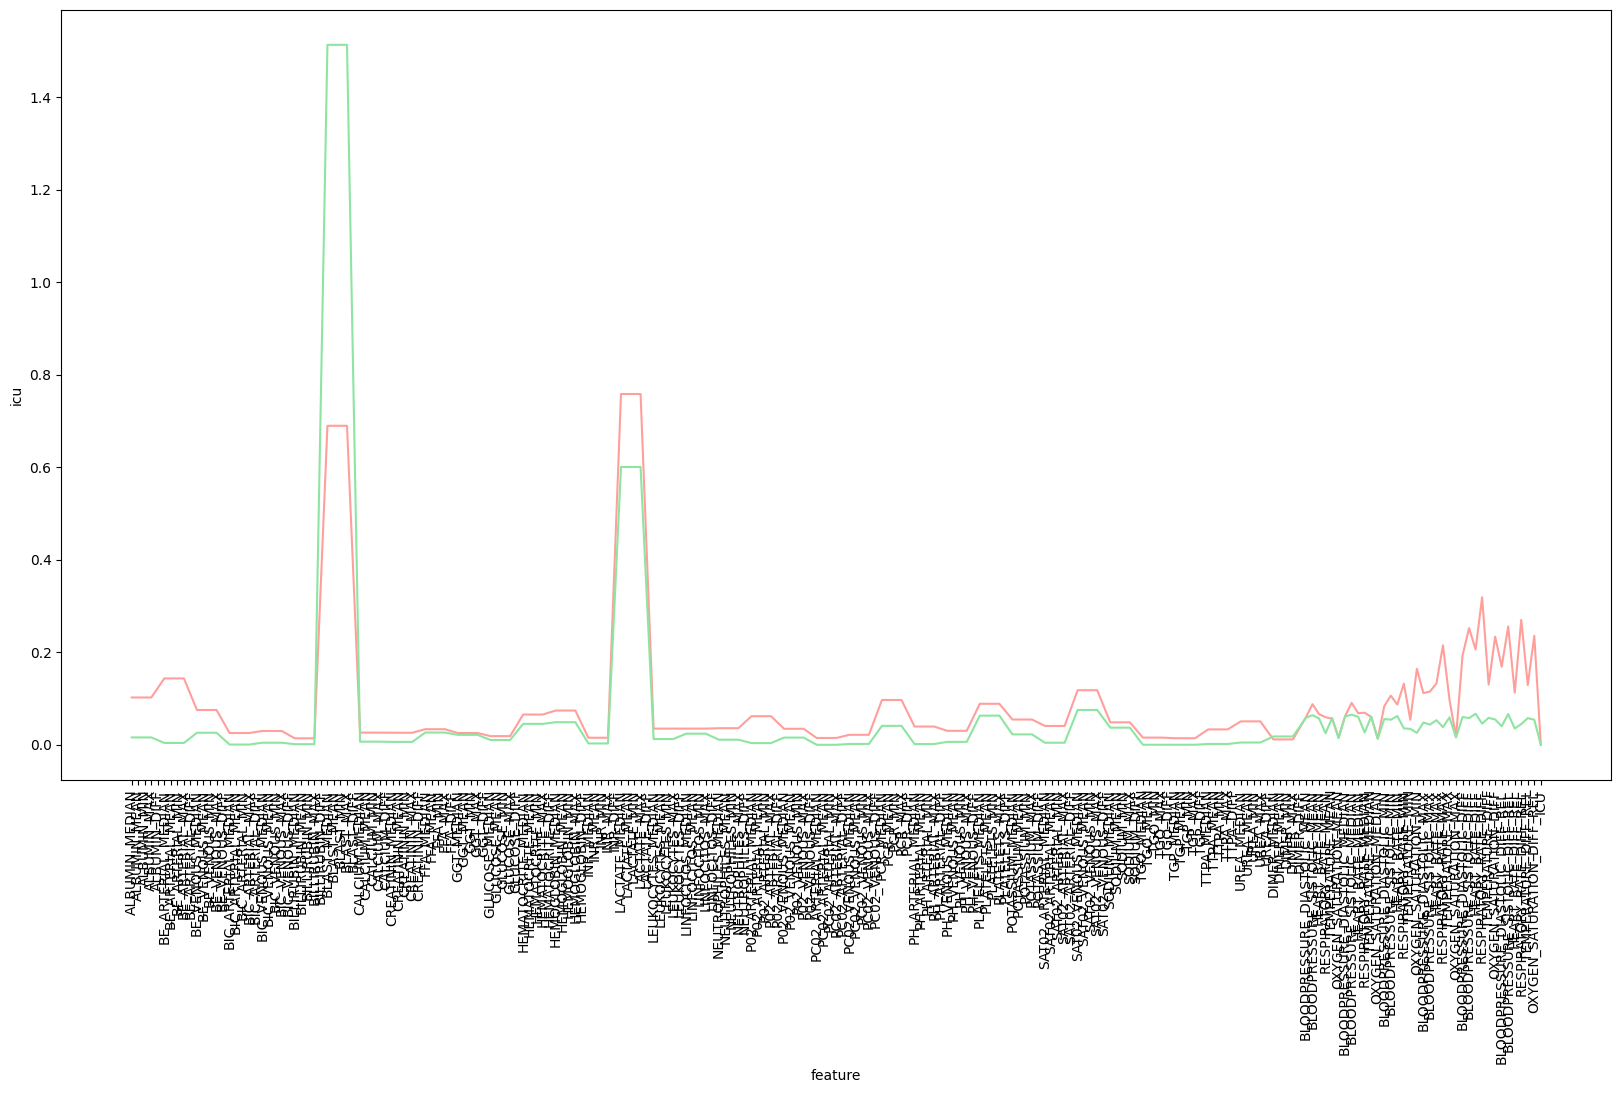

In [135]:
figure = plt.subplots(figsize=(20,10))
ax = sns.lineplot(data=vital_signs, x="feature", y="icu", color='r')
sns.lineplot(data=vital_signs, x="feature", y="non-icu", color='g')
plt.xticks(rotation=90)
plt.show()

 #**Correlation**

In [136]:
#correlation between features
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-136-dcad90a240d6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65    GENDER  \
PATIENT_VISIT_IDENTIFIER                    1.000000    -0.030727  0.059772   
AGE_ABOVE65                                -0.030727     1.000000  0.049744   
GENDER                                      0.059772     0.049744  1.000000   
DISEASE GROUPING 1                          0.076389     0.266971  0.038474   
DISEASE GROUPING 2                          0.044868     0.067469 -0.032425   
...                                              ...          ...       ...   
HEART_RATE_DIFF_REL                        -0.062864     0.078043 -0.061459   
RESPIRATORY_RATE_DIFF_REL                  -0.033841     0.194526 -0.032294   
TEMPERATURE_DIFF_REL                       -0.009434     0.120793 -0.039388   
OXYGEN_SATURATION_DIFF_REL                 -0.084552     0.156462 -0.053648   
ICU                                        -0.047547     0.212198 -0.065543   

                            DISEASE GROUPING 1  DISEASE GROUPING 2  \
PATIENT_VISIT_IDENTIFIER              0.076389            0.044868   
AGE_ABOVE65                           0.266971            0.067469   
GENDER                                0.038474           -0.032425   
DISEASE GROUPING 1                    1.000000            0.194104   
DISEASE GROUPING 2                    0.194104            1.000000   
...                                        ...                 ...   
HEART_RATE_DIFF_REL                   0.075491            0.079411   
RESPIRATORY_RATE_DIFF_REL             0.098237            0.161710   
TEMPERATURE_DIFF_REL                  0.023624            0.125211   
OXYGEN_SATURATION_DIFF_REL           -0.021001            0.126000   
ICU                                   0.061308            0.081883   

                            DISEASE GROUPING 3  DISEASE GROUPING 4  \
PATIENT_VISIT_IDENTIFIER              0.041014           -0.017013   
AGE_ABOVE65                           0.157591            0.016392   
GENDER                               -0.074494           -0.054625   
DISEASE GROUPING 1                    0.240389            0.010628   
DISEASE GROUPING 2                    0.102950            0.111533   
...                                        ...                 ...   
HEART_RATE_DIFF_REL                   0.131012            0.029518   
RESPIRATORY_RATE_DIFF_REL             0.155858            0.044440   
TEMPERATURE_DIFF_REL                  0.136617            0.024750   
OXYGEN_SATURATION_DIFF_REL            0.108476            0.055793   
ICU                                   0.077422            0.057456   

                            DISEASE GROUPING 5  DISEASE GROUPING 6       HTN  \
PATIENT_VISIT_IDENTIFIER              0.009263            0.014407 -0.015724   
AGE_ABOVE65                           0.305052           -0.015739  0.319354   
GENDER                               -0.022495           -0.016748 -0.029630   
DISEASE GROUPING 1                    0.332670            0.168473  0.416207   
DISEASE GROUPING 2                    0.142148           -0.007918  0.150010   
...                                        ...                 ...       ...   
HEART_RATE_DIFF_REL                   0.148261            0.093692  0.156408   
RESPIRATORY_RATE_DIFF_REL             0.165136            0.081410  0.188997   
TEMPERATURE_DIFF_REL                  0.104542            0.118646  0.152099   
OXYGEN_SATURATION_DIFF_REL            0.058458            0.065308  0.089984   
ICU                                   0.087988           -0.006344  0.170247   

                            IMMUNOCOMPROMISED     OTHER  ALBUMIN_MEDIAN  \
PATIENT_VISIT_IDENTIFIER             0.011507  0.033008        0.036972   
AGE_ABOVE65                          0.152959  0.074727       -0.160707   
GENDER                              -0.007142  0.027424       -0.000063   
DISEASE GROUPING 1                   0.183926  0.156061       -0.067750   
DISEASE GROUPING 2                   0.124698  0.082418      

<ipython-input-137-439377970cfa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


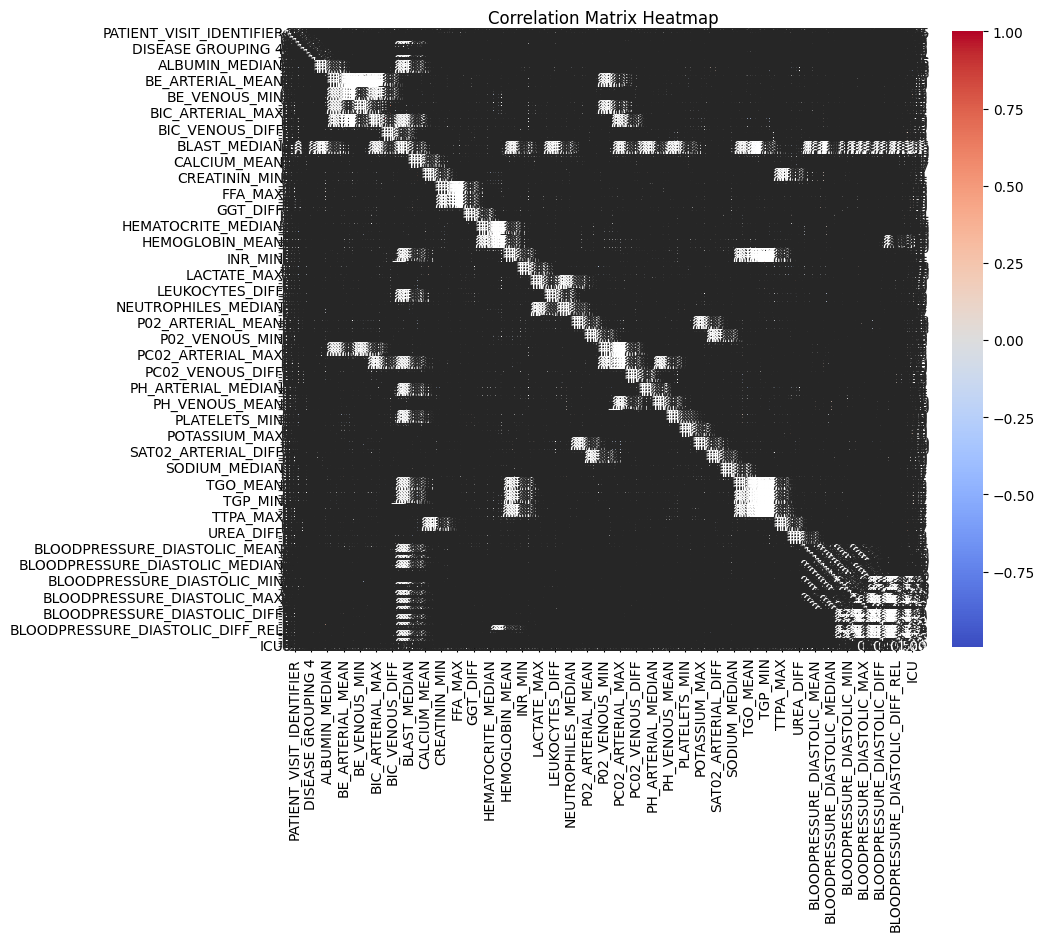

In [137]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: >

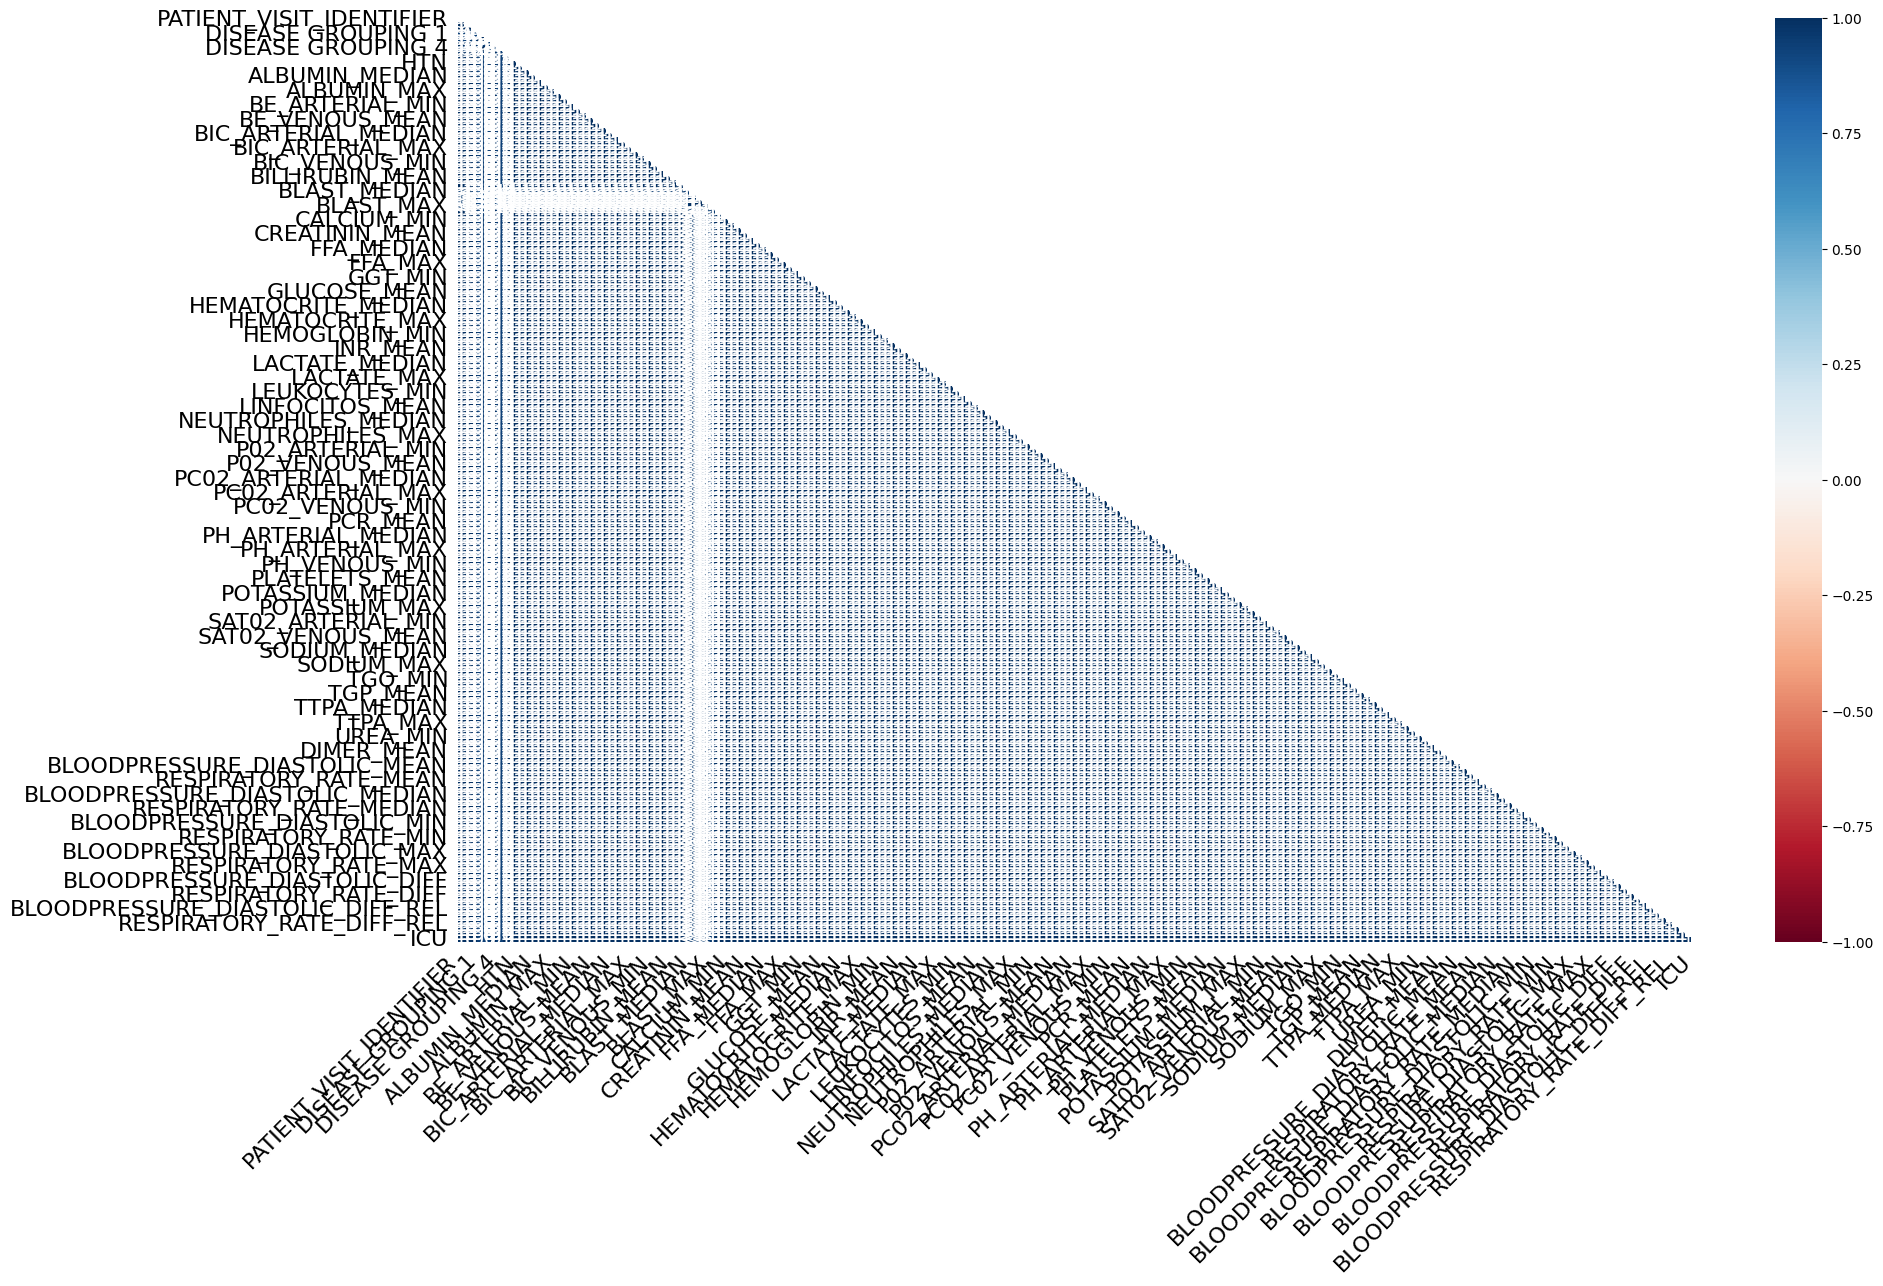

In [138]:
msno.heatmap(correlation_matrix)

# **3.Feature Engineering**

In [139]:
# check for duplicate columns i.e columns having all values exactly equal
duplicated = df.T.duplicated()
count = 0

for i in range(len(duplicated)):
    if duplicated[i] == True:
        print(duplicated.index[i], ":", duplicated[i])
        count += 1

print("total duplicate columns = ", count)

ALBUMIN_MEAN : True
ALBUMIN_MIN : True
ALBUMIN_MAX : True
BE_ARTERIAL_MEAN : True
BE_ARTERIAL_MIN : True
BE_ARTERIAL_MAX : True
BE_ARTERIAL_DIFF : True
BE_VENOUS_MEAN : True
BE_VENOUS_MIN : True
BE_VENOUS_MAX : True
BE_VENOUS_DIFF : True
BIC_ARTERIAL_MEAN : True
BIC_ARTERIAL_MIN : True
BIC_ARTERIAL_MAX : True
BIC_ARTERIAL_DIFF : True
BIC_VENOUS_MEAN : True
BIC_VENOUS_MIN : True
BIC_VENOUS_MAX : True
BIC_VENOUS_DIFF : True
BILLIRUBIN_MEAN : True
BILLIRUBIN_MIN : True
BILLIRUBIN_MAX : True
BILLIRUBIN_DIFF : True
BLAST_MEAN : True
BLAST_MIN : True
BLAST_MAX : True
BLAST_DIFF : True
CALCIUM_MEAN : True
CALCIUM_MIN : True
CALCIUM_MAX : True
CALCIUM_DIFF : True
CREATININ_MEAN : True
CREATININ_MIN : True
CREATININ_MAX : True
CREATININ_DIFF : True
FFA_MEAN : True
FFA_MIN : True
FFA_MAX : True
FFA_DIFF : True
GGT_MEAN : True
GGT_MIN : True
GGT_MAX : True
GGT_DIFF : True
GLUCOSE_MEAN : True
GLUCOSE_MIN : True
GLUCOSE_MAX : True
GLUCOSE_DIFF : True
HEMATOCRITE_MEAN : True
HEMATOCRITE_MIN : True
H

In [140]:
# Removing the duplicate columns found above
df = df.T.drop_duplicates().T

In [141]:
df.shape

(1925, 88)

In [142]:
df

PATIENT_VISIT_IDENTIFIER AGE_ABOVE65 AGE_PERCENTIL GENDER  \
0                           0           1          60th      0   
1                           0           1          60th      0   
2                           0           1          60th      0   
3                           0           1          60th      0   
4                           0           1          60th      0   
...                       ...         ...           ...    ...   
1920                      384           0          50th      1   
1921                      384           0          50th      1   
1922                      384           0          50th      1   
1923                      384           0          50th      1   
1924                      384           0          50th      1   

     DISEASE GROUPING 1 DISEASE GROUPING 2 DISEASE GROUPING 3  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   0.0                0.0                0.0   
3                   0.0                0.0                0.0   
4                   0.0                0.0                0.0   
...                 ...                ...                ...   
1920                0.0                0.0                0.0   
1921                0.0                0.0                0.0   
1922                0.0                0.0                0.0   
1923                0.0                0.0                0.0   
1924                0.0                0.0                1.0   

     DISEASE GROUPING 4 DISEASE GROUPING 5 DISEASE GROUPING 6  HTN  \
0                   0.0                1.0                1.0  0.0   
1                   0.0                1.0                1.0  0.0   
2                   0.0                1.0                1.0  0.0   
3                   0.0                1.0                1.0  0.0   
4                   0.0                1.0                1.0  0.0   
...                 ...                ...                ...  ...   
1920                0.0                0.0                0.0  0.0   
1921                0.0                0.0                0.0  0.0   
1922                0.0                0.0                0.0  0.0   
1923                0.0                0.0                0.0  0.0   
1924                0.0                0.0                0.0  0.0   

     IMMUNOCOMPROMISED OTHER ALBUMIN_MEDIAN ALBUMIN_DIFF BE_ARTERIAL_MEDIAN  \
0                  0.0   1.0            NaN          NaN                NaN   
1                  0.0   1.0            NaN          NaN                NaN   
2                  0.0   1.0       0.605263          NaN                NaN   
3                  0.0   1.0            NaN          NaN                NaN   
4                  0.0   1.0            0.0          NaN          -0.871658   
...                ...   ...            ...          ...                ...   
1920               0.0   1.0            NaN          NaN                NaN   
1921               0.0   1.0       0.605263          NaN                NaN   
1922               0.0   1.0            NaN          NaN                NaN   
1923               0.0   1.0            NaN          NaN                NaN   
1924               0.0   1.0       0.605263          NaN                NaN   

     BE_VENOUS_MEDIAN BIC_ARTERIAL_MEDIAN BIC_VENOUS_MEDIAN BILLIRUBIN_MEDIAN  \
0                 NaN                 NaN               NaN               NaN   
1                 NaN                 NaN               NaN               NaN   
2                 NaN           -0.317073         -0.317073          -0.93895   
3                 NaN                 NaN               NaN               NaN   
4           -0.863874           -0.317073         -0.414634         -0.979069   
...               ...                 ...               ...               ...   
1920              NaN                 NaN               NaN               

Invariant Features

In [143]:
#identifying irrevelant columns
# Calculate the variance for each numerical column
variance_threshold = 0.1  # Adjust this threshold as needed
low_variance_columns = df.var()[df.var() < variance_threshold].index.tolist()

<ipython-input-143-0eeeb1bc44c7>:4: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  low_variance_columns = df.var()[df.var() < variance_threshold].index.tolist()
<ipython-input-143-0eeeb1bc44c7>:4: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  low_variance_columns = df.var()[df.var() < variance_threshold].index.tolist()


**Handling Missing Values**

In [144]:
# Identify columns with a high percentage of missing values
missing_value_threshold = 0.5  # Adjust this threshold as needed
missing_value_columns = df.columns[df.isnull().mean() > missing_value_threshold].tolist()


In [145]:
# Combine both sets of irrelevant columns
irrelevant_columns = set(low_variance_columns + missing_value_columns)

In [146]:
# Display the list of irrelevant columns
print("\nIrrelevant Columns:")
print(irrelevant_columns)


Irrelevant Columns:
{'BE_VENOUS_MEDIAN', 'DISEASE GROUPING 1', 'ALBUMIN_MEDIAN', 'TEMPERATURE_DIFF', 'SODIUM_MEDIAN', 'GLUCOSE_MEDIAN', 'P02_ARTERIAL_MEDIAN', 'TGO_MEDIAN', 'P02_VENOUS_MEDIAN', 'BLOODPRESSURE_SISTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF', 'BLOODPRESSURE_SISTOLIC_MIN', 'PCR_MEDIAN', 'BIC_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MEDIAN', 'OXYGEN_SATURATION_MIN', 'BLOODPRESSURE_DIASTOLIC_DIFF', 'ALBUMIN_DIFF', 'SAT02_VENOUS_MEDIAN', 'BLOODPRESSURE_DIASTOLIC_MAX', 'BIC_VENOUS_MEDIAN', 'DISEASE GROUPING 2', 'BLOODPRESSURE_SISTOLIC_MAX', 'HEART_RATE_DIFF_REL', 'LINFOCITOS_MEDIAN', 'HEART_RATE_MAX', 'DISEASE GROUPING 6', 'DISEASE GROUPING 3', 'OXYGEN_SATURATION_DIFF_REL', 'RESPIRATORY_RATE_MIN', 'TTPA_MEDIAN', 'TEMPERATURE_DIFF_REL', 'CREATININ_MEDIAN', 'SAT02_ARTERIAL_MEDIAN', 'DISEASE GROUPING 4', 'TEMPERATURE_MAX', 'BLAST_MEDIAN', 'LEUKOCYTES_MEDIAN', 'PLATELETS_MEDIAN', 'PH_VENOUS_MEDIAN', 'HEMOGLOBIN_MEDIAN', 'NEUTROPHILES_MEDIAN', 'OXYGEN_SATURATION_MEAN', 'BLOODPRESSURE_SIS

Finding the Binary Features in the dataset

In [147]:
columns_to_convert = ['DISEASE GROUPING 1','DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4',
                       'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED',
                       'OTHER', 'ALBUMIN_MEDIAN', 'BE_ARTERIAL_MEDIAN', 'BE_VENOUS_MEDIAN',
                       'BIC_ARTERIAL_MEDIAN', 'BIC_VENOUS_MEDIAN', 'BILLIRUBIN_MEDIAN',
                       'BLAST_MEDIAN', 'CALCIUM_MEDIAN', 'CREATININ_MEDIAN', 'FFA_MEDIAN',
                       'GGT_MEDIAN', 'GLUCOSE_MEDIAN', 'HEMATOCRITE_MEDIAN',
                       'HEMOGLOBIN_MEDIAN', 'INR_MEDIAN', 'LACTATE_MEDIAN',
                       'LEUKOCYTES_MEDIAN', 'LINFOCITOS_MEDIAN', 'NEUTROPHILES_MEDIAN',
                       'P02_ARTERIAL_MEDIAN', 'P02_VENOUS_MEDIAN', 'PC02_ARTERIAL_MEDIAN',
                       'PC02_VENOUS_MEDIAN', 'PCR_MEDIAN', 'PH_ARTERIAL_MEDIAN',
                       'PH_VENOUS_MEDIAN', 'PLATELETS_MEDIAN', 'POTASSIUM_MEDIAN',
                       'SAT02_ARTERIAL_MEDIAN', 'SAT02_VENOUS_MEDIAN', 'SODIUM_MEDIAN',
                       'TGO_MEDIAN', 'TGP_MEDIAN', 'TTPA_MEDIAN', 'UREA_MEDIAN',
                       'DIMER_MEDIAN', 'BLOODPRESSURE_DIASTOLIC_MEAN',
                       'BLOODPRESSURE_SISTOLIC_MEAN', 'HEART_RATE_MEAN',
                       'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN',
                       'BLOODPRESSURE_DIASTOLIC_MEDIAN', 'BLOODPRESSURE_SISTOLIC_MEDIAN',
                       'HEART_RATE_MEDIAN', 'RESPIRATORY_RATE_MEDIAN', 'TEMPERATURE_MEDIAN',
                       'OXYGEN_SATURATION_MEDIAN', 'BLOODPRESSURE_DIASTOLIC_MIN',
                       'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN',
                       'TEMPERATURE_MIN', 'OXYGEN_SATURATION_MIN',
                       'BLOODPRESSURE_DIASTOLIC_MAX', 'BLOODPRESSURE_SISTOLIC_MAX',
                       'HEART_RATE_MAX', 'RESPIRATORY_RATE_MAX', 'TEMPERATURE_MAX',
                       'OXYGEN_SATURATION_MAX', 'BLOODPRESSURE_DIASTOLIC_DIFF',
                       'BLOODPRESSURE_SISTOLIC_DIFF', 'HEART_RATE_DIFF',
                       'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
                       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
                       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
                       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL']
threshold=0.5
df[columns_to_convert]= df[columns_to_convert].applymap(lambda x: 1 if x > threshold else 0)

print(df)

     PATIENT_VISIT_IDENTIFIER AGE_ABOVE65 AGE_PERCENTIL GENDER  \
0                           0           1          60th      0   
1                           0           1          60th      0   
2                           0           1          60th      0   
3                           0           1          60th      0   
4                           0           1          60th      0   
...                       ...         ...           ...    ...   
1920                      384           0          50th      1   
1921                      384           0          50th      1   
1922                      384           0          50th      1   
1923                      384           0          50th      1   
1924                      384           0          50th      1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                      0                   0                   0   
1                      0                   0                   0   
2  

In [148]:
binary_features = [col for col in df.columns if len(df[col].unique()) == 2]
print("Binary Features:", binary_features)

Binary Features: ['AGE_ABOVE65', 'GENDER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED', 'OTHER', 'ALBUMIN_MEDIAN', 'BE_ARTERIAL_MEDIAN', 'BE_VENOUS_MEDIAN', 'BIC_ARTERIAL_MEDIAN', 'BIC_VENOUS_MEDIAN', 'BILLIRUBIN_MEDIAN', 'BLAST_MEDIAN', 'CALCIUM_MEDIAN', 'CREATININ_MEDIAN', 'FFA_MEDIAN', 'GGT_MEDIAN', 'GLUCOSE_MEDIAN', 'HEMATOCRITE_MEDIAN', 'HEMOGLOBIN_MEDIAN', 'INR_MEDIAN', 'LACTATE_MEDIAN', 'LEUKOCYTES_MEDIAN', 'LINFOCITOS_MEDIAN', 'NEUTROPHILES_MEDIAN', 'P02_ARTERIAL_MEDIAN', 'P02_VENOUS_MEDIAN', 'PC02_ARTERIAL_MEDIAN', 'PC02_VENOUS_MEDIAN', 'PCR_MEDIAN', 'PH_ARTERIAL_MEDIAN', 'PH_VENOUS_MEDIAN', 'PLATELETS_MEDIAN', 'POTASSIUM_MEDIAN', 'SAT02_ARTERIAL_MEDIAN', 'SAT02_VENOUS_MEDIAN', 'SODIUM_MEDIAN', 'TGO_MEDIAN', 'TGP_MEDIAN', 'TTPA_MEDIAN', 'UREA_MEDIAN', 'DIMER_MEDIAN', 'BLOODPRESSURE_DIASTOLIC_MEAN', 'BLOODPRESSURE_SISTOLIC_MEAN', 'HEART_RATE_MEAN', 'RESPIRATORY_RAT

In [149]:
# select non-numeric columns
df_num = df.select_dtypes(exclude=[np.number])
df_num

PATIENT_VISIT_IDENTIFIER AGE_ABOVE65 AGE_PERCENTIL GENDER ALBUMIN_DIFF  \
0                           0           1          60th      0          NaN   
1                           0           1          60th      0          NaN   
2                           0           1          60th      0          NaN   
3                           0           1          60th      0          NaN   
4                           0           1          60th      0          NaN   
...                       ...         ...           ...    ...          ...   
1920                      384           0          50th      1          NaN   
1921                      384           0          50th      1          NaN   
1922                      384           0          50th      1          NaN   
1923                      384           0          50th      1          NaN   
1924                      384           0          50th      1          NaN   

        WINDOW ICU  
0          0-2   0  
1          2-4   0  
2          4-6   0  
3         6-12   0  
4     ABOVE_12   1  
...        ...  ..  
1920       0-2   0  
1921       2-4   0  
1922       4-6   0  
1923      6-12   0  
1924  ABOVE_12   0  

[1925 rows x 7 columns]

In [150]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Display the names of categorical columns
print("Categorical Features:")
print(categorical_columns)

Categorical Features:
Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'ALBUMIN_DIFF', 'WINDOW', 'ICU'],
      dtype='object')


In [151]:
# Group by 'patient_id' and count the entries for each patient
patient_entries_count = df.groupby('PATIENT_VISIT_IDENTIFIER').size()

In [152]:
# Display the counts
print(patient_entries_count)

PATIENT_VISIT_IDENTIFIER
0      5
1      5
2      5
3      5
4      5
      ..
380    5
381    5
382    5
383    5
384    5
Length: 385, dtype: int64


**changing categorical features to numerical with OrdinalEncoder**

In [153]:
# Create an empty DataFrame to store the unique values
unique_values_table = pd.DataFrame(columns=['Feature', 'Unique_Values'])

# Iterate through each categorical feature
for feature in categorical_columns:
    unique_values = df[feature].unique()
    unique_values_table = unique_values_table.append({'Feature': feature, 'Unique_Values': unique_values}, ignore_index=True)

# Display the table
print(unique_values_table)

                    Feature                                      Unique_Values
0  PATIENT_VISIT_IDENTIFIER  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
1               AGE_ABOVE65                                             [1, 0]
2             AGE_PERCENTIL  [60th, 90th, 10th, 40th, 70th, 20th, 50th, 80t...
3                    GENDER                                             [0, 1]
4              ALBUMIN_DIFF                                              [nan]
5                    WINDOW                    [0-2, 2-4, 4-6, 6-12, ABOVE_12]
6                       ICU                                             [0, 1]


<ipython-input-153-779aa75f0c44>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values_table = unique_values_table.append({'Feature': feature, 'Unique_Values': unique_values}, ignore_index=True)
<ipython-input-153-779aa75f0c44>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values_table = unique_values_table.append({'Feature': feature, 'Unique_Values': unique_values}, ignore_index=True)
<ipython-input-153-779aa75f0c44>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values_table = unique_values_table.append({'Feature': feature, 'Unique_Values': unique_values}, ignore_index=True)
<ipython-input-153-779aa75f0c44>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

In [154]:
# Select non-numerical features (categorical) using select_dtypes
non_numerical_features = df.select_dtypes(exclude='number').columns.tolist()

# Print or use the list of non-numerical features
print("Non-Numerical Features:", non_numerical_features)

Non-Numerical Features: ['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'ALBUMIN_DIFF', 'WINDOW', 'ICU']


we know that each patient has 5 records in different 'window'. as the information of patient after admitting ICU =1 is not important the following codes will adress this problem.

In [155]:
# as the order of 'WINDOW' is important for us we used OrdinalEncoder and assigned a label to each period
ordinal_mapping = {'0-2': 0, '2-4': 1, '4-6': 2, '6-12':3, 'ABOVE_12': 4}
df['WINDOW'] = df['WINDOW'].map(ordinal_mapping)
df['WINDOW']

#columns_to_display = ['PATIENT_VISIT_IDENTIFIER','WINDOW']
#rint(df[columns_to_display])


0       0
1       1
2       2
3       3
4       4
       ..
1920    0
1921    1
1922    2
1923    3
1924    4
Name: WINDOW, Length: 1925, dtype: int64

In [156]:
#underestang relation between patientid and window and icu
columns_to_display = ['PATIENT_VISIT_IDENTIFIER', 'WINDOW','ICU']
print(df[columns_to_display])

     PATIENT_VISIT_IDENTIFIER  WINDOW ICU
0                           0       0   0
1                           0       1   0
2                           0       2   0
3                           0       3   0
4                           0       4   1
...                       ...     ...  ..
1920                      384       0   0
1921                      384       1   0
1922                      384       2   0
1923                      384       3   0
1924                      384       4   0

[1925 rows x 3 columns]


In [157]:
# Sort the DataFrame by patient_id and window
##this window feature rules like time period in this dataframe
df = df.sort_values(by=['PATIENT_VISIT_IDENTIFIER', 'WINDOW'])

In [158]:
df_PAICU =['PATIENT_VISIT_IDENTIFIER','ICU']
print(df[df_PAICU])


     PATIENT_VISIT_IDENTIFIER ICU
0                           0   0
1                           0   0
2                           0   0
3                           0   0
4                           0   1
...                       ...  ..
1920                      384   0
1921                      384   0
1922                      384   0
1923                      384   0
1924                      384   0

[1925 rows x 2 columns]


In this step we drop records of each patient after they admitted to be ICU = 1, remaining first ICU =1 and dropped records after that.

In [159]:
# Initialize an empty list to store indices to be dropped
indices_to_drop = []

# Iterate through the DataFrame
for i in range(1, len(df)):
    current_id = df.at[i, 'PATIENT_VISIT_IDENTIFIER']
    previous_id = df.at[i-1, 'PATIENT_VISIT_IDENTIFIER']

    current_icu = df.at[i, 'ICU']
    previous_icu = df.at[i-1, 'ICU']

    # Check if both current and previous rows have ICU admission and the IDs are the same
    if current_icu == 1 and previous_icu == 1 and current_id == previous_id:
        indices_to_drop.append(i)

# Drop the rows based on the indices collected
df.drop(indices_to_drop, inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)



In [160]:
df

PATIENT_VISIT_IDENTIFIER AGE_ABOVE65 AGE_PERCENTIL GENDER  \
0                           0           1          60th      0   
1                           0           1          60th      0   
2                           0           1          60th      0   
3                           0           1          60th      0   
4                           0           1          60th      0   
...                       ...         ...           ...    ...   
1600                      384           0          50th      1   
1601                      384           0          50th      1   
1602                      384           0          50th      1   
1603                      384           0          50th      1   
1604                      384           0          50th      1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                      0                   0                   0   
1                      0                   0                   0   
2                      0                   0                   0   
3                      0                   0                   0   
4                      0                   0                   0   
...                  ...                 ...                 ...   
1600                   0                   0                   0   
1601                   0                   0                   0   
1602                   0                   0                   0   
1603                   0                   0                   0   
1604                   0                   0                   1   

      DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                      0                   1                   1    0   
1                      0                   1                   1    0   
2                      0                   1                   1    0   
3                      0                   1                   1    0   
4                      0                   1                   1    0   
...                  ...                 ...                 ...  ...   
1600                   0                   0                   0    0   
1601                   0                   0                   0    0   
1602                   0                   0                   0    0   
1603                   0                   0                   0    0   
1604                   0                   0                   0    0   

      IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN ALBUMIN_DIFF  \
0                     0      1               0          NaN   
1                     0      1               0          NaN   
2                     0      1               1          NaN   
3                     0      1               0          NaN   
4                     0      1               0          NaN   
...                 ...    ...             ...          ...   
1600                  0      1               0          NaN   
1601                  0      1               1          NaN   
1602                  0      1               0          NaN   
1603                  0      1               0          NaN   
1604                  0      1               1          NaN   

      BE_ARTERIAL_MEDIAN  BE_VENOUS_MEDIAN  BIC_ARTERIAL_MEDIAN  \
0                      0                 0                    0   
1                      0                 0                    0   
2                      0                 0                    0   
3                      0                 0                    0   
4                      0                 0                    0   
...                  ...               ...                  ...   
1600                   0                 0                    0   
1601                   0                 0                    0   
1602                   0                 0                    0   
1603                   0                 0                    0   
1604                   0

since it is hard for machine to detect categorical features with big number of values, we used dummy for 'AGE_PERCENTIL' and since our work with window as time period have been done we can dummy it as well.

In [161]:
#Applying OneHOt Encoding using Pandas

df = pd.get_dummies(df, columns=['AGE_PERCENTIL', 'WINDOW'])


In [162]:
df

PATIENT_VISIT_IDENTIFIER AGE_ABOVE65 GENDER  DISEASE GROUPING 1  \
0                           0           1      0                   0   
1                           0           1      0                   0   
2                           0           1      0                   0   
3                           0           1      0                   0   
4                           0           1      0                   0   
...                       ...         ...    ...                 ...   
1600                      384           0      1                   0   
1601                      384           0      1                   0   
1602                      384           0      1                   0   
1603                      384           0      1                   0   
1604                      384           0      1                   0   

      DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
0                      0                   0                   0   
1                      0                   0                   0   
2                      0                   0                   0   
3                      0                   0                   0   
4                      0                   0                   0   
...                  ...                 ...                 ...   
1600                   0                   0                   0   
1601                   0                   0                   0   
1602                   0                   0                   0   
1603                   0                   0                   0   
1604                   0                   1                   0   

      DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  IMMUNOCOMPROMISED  OTHER  \
0                      1                   1    0                  0      1   
1                      1                   1    0                  0      1   
2                      1                   1    0                  0      1   
3                      1                   1    0                  0      1   
4                      1                   1    0                  0      1   
...                  ...                 ...  ...                ...    ...   
1600                   0                   0    0                  0      1   
1601                   0                   0    0                  0      1   
1602                   0                   0    0                  0      1   
1603                   0                   0    0                  0      1   
1604                   0                   0    0                  0      1   

      ALBUMIN_MEDIAN ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_VENOUS_MEDIAN  \
0                  0          NaN                   0                 0   
1                  0          NaN                   0                 0   
2                  1          NaN                   0                 0   
3                  0          NaN                   0                 0   
4                  0          NaN                   0                 0   
...              ...          ...                 ...               ...   
1600               0          NaN                   0                 0   
1601               1          NaN                   0                 0   
1602               0          NaN                   0                 0   
1603               0          NaN                   0                 0   
1604               1          NaN                   0                 0   

      BIC_ARTERIAL_MEDIAN  BIC_VENOUS_MEDIAN  BILLIRUBIN_MEDIAN  BLAST_MEDIAN  \
0                       0                  0                  0             0   
1                       0                  0                  0             0   
2                       0                  0                  0             0   
3                       0                  0                  0             0   
4                       0                  0                  0     

# **Missing Values**
we decide to use

In [163]:
df.interpolate(method='linear', inplace=True)  # Linear interpolation


In [164]:
# Get the count of missing values for each column
missing_values = df.isnull().sum()

# Filter columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Display columns with missing values and their respective counts
if not columns_with_missing_values.empty:
    print("Columns with Missing Values:")
    print(columns_with_missing_values)
else:
    print("No missing values in any column.")


Columns with Missing Values:
ALBUMIN_DIFF    1605
dtype: int64


In [165]:
# Drop the ALBUMIN_DIFF
df = df.drop(columns='ALBUMIN_DIFF')

In [166]:
# Get the count of missing values for each column
missing_values = df.isnull().sum()

# Filter columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Display columns with missing values and their respective counts
if not columns_with_missing_values.empty:
    print("Columns with Missing Values:")
    print(columns_with_missing_values)
else:
    print("No missing values in any column.")


No missing values in any column.


**columns with lack variability**

In [167]:
## Are there any constant value columns
const_columns = list(df.columns[df.nunique() <= 1])
const_columns

['BE_VENOUS_MEDIAN',
 'BIC_VENOUS_MEDIAN',
 'INR_MEDIAN',
 'LEUKOCYTES_MEDIAN',
 'NEUTROPHILES_MEDIAN',
 'PC02_ARTERIAL_MEDIAN',
 'PC02_VENOUS_MEDIAN',
 'TGO_MEDIAN',
 'TGP_MEDIAN',
 'TTPA_MEDIAN',
 'UREA_MEDIAN',
 'TEMPERATURE_DIFF',
 'HEART_RATE_DIFF_REL',
 'TEMPERATURE_DIFF_REL']

In [168]:
# Remove these constant value columns from the set
df.drop(const_columns, axis = 'columns', inplace = True)
df

PATIENT_VISIT_IDENTIFIER AGE_ABOVE65 GENDER  DISEASE GROUPING 1  \
0                           0           1      0                   0   
1                           0           1      0                   0   
2                           0           1      0                   0   
3                           0           1      0                   0   
4                           0           1      0                   0   
...                       ...         ...    ...                 ...   
1600                      384           0      1                   0   
1601                      384           0      1                   0   
1602                      384           0      1                   0   
1603                      384           0      1                   0   
1604                      384           0      1                   0   

      DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
0                      0                   0                   0   
1                      0                   0                   0   
2                      0                   0                   0   
3                      0                   0                   0   
4                      0                   0                   0   
...                  ...                 ...                 ...   
1600                   0                   0                   0   
1601                   0                   0                   0   
1602                   0                   0                   0   
1603                   0                   0                   0   
1604                   0                   1                   0   

      DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  IMMUNOCOMPROMISED  OTHER  \
0                      1                   1    0                  0      1   
1                      1                   1    0                  0      1   
2                      1                   1    0                  0      1   
3                      1                   1    0                  0      1   
4                      1                   1    0                  0      1   
...                  ...                 ...  ...                ...    ...   
1600                   0                   0    0                  0      1   
1601                   0                   0    0                  0      1   
1602                   0                   0    0                  0      1   
1603                   0                   0    0                  0      1   
1604                   0                   0    0                  0      1   

      ALBUMIN_MEDIAN  BE_ARTERIAL_MEDIAN  BIC_ARTERIAL_MEDIAN  \
0                  0                   0                    0   
1                  0                   0                    0   
2                  1                   0                    0   
3                  0                   0                    0   
4                  0                   0                    0   
...              ...                 ...                  ...   
1600               0                   0                    0   
1601               1                   0                    0   
1602               0                   0                    0   
1603               0                   0                    0   
1604               1                   0                    0   

      BILLIRUBIN_MEDIAN  BLAST_MEDIAN  CALCIUM_MEDIAN  CREATININ_MEDIAN  \
0                     0             0               0                 0   
1                     0             0               0                 0   
2                     0             0               0                 0   
3                     0             0               0                 0   
4                     0             0               0                 0   
...                 ...           ...             ...               ...   
1600                  0             0               0               

In [169]:
# Patient ID 199 seems not having data , decided to remove this from the set
df = df[df['PATIENT_VISIT_IDENTIFIER'] != 199]

print(df.isna().sum()[df.isna().sum() > 0])

Series([], dtype: int64)


In [170]:
df.dtypes

PATIENT_VISIT_IDENTIFIER    object
AGE_ABOVE65                 object
GENDER                      object
DISEASE GROUPING 1           int64
DISEASE GROUPING 2           int64
                             ...  
WINDOW_0                     uint8
WINDOW_1                     uint8
WINDOW_2                     uint8
WINDOW_3                     uint8
WINDOW_4                     uint8
Length: 86, dtype: object

**SKEWness**

In [171]:
from scipy.stats import skew

In [172]:
import numpy as np
from scipy.stats import skew

def handle_skewness(dataframe, skew_threshold=0.5):
    numerical_columns = dataframe.select_dtypes(include=np.number).columns
    skewed_columns = dataframe[numerical_columns].apply(lambda x: skew(x))

    for column, skew_value in skewed_columns.items():
        if abs(skew_value) > skew_threshold:
            if skew_value > 0:
                # Right-skewed, apply log transformation
                dataframe[column] = np.log1p(dataframe[column])
                print(f"Applied log transformation to {column}")
            elif skew_value < 0:
                # Left-skewed, apply reciprocal transformation
                dataframe[column] = 1 / dataframe[column]
                print(f"Applied reciprocal transformation to {column}")

    return dataframe

# Apply the function to your DataFrame
df = handle_skewness(df)



Applied log transformation to DISEASE GROUPING 1
Applied log transformation to DISEASE GROUPING 2
Applied log transformation to DISEASE GROUPING 3
Applied log transformation to DISEASE GROUPING 4
Applied log transformation to DISEASE GROUPING 5
Applied log transformation to DISEASE GROUPING 6
Applied log transformation to HTN
Applied log transformation to IMMUNOCOMPROMISED
Applied reciprocal transformation to OTHER
Applied log transformation to ALBUMIN_MEDIAN
Applied log transformation to BE_ARTERIAL_MEDIAN
Applied log transformation to BIC_ARTERIAL_MEDIAN
Applied log transformation to BILLIRUBIN_MEDIAN
Applied log transformation to BLAST_MEDIAN
Applied log transformation to CALCIUM_MEDIAN
Applied log transformation to CREATININ_MEDIAN
Applied log transformation to FFA_MEDIAN
Applied log transformation to GGT_MEDIAN
Applied log transformation to GLUCOSE_MEDIAN
Applied log transformation to HEMATOCRITE_MEDIAN
Applied log transformation to HEMOGLOBIN_MEDIAN
Applied log transformation to 

<ipython-input-172-8597f6656d9b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = np.log1p(dataframe[column])
<ipython-input-172-8597f6656d9b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = 1 / dataframe[column]


# **PCA**

In [173]:
# Separate the features from the target variable
X = df.drop('ICU', axis=1)
y = df['ICU']

In [174]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [177]:
#just in case code gots error run this column
X = X.replace([np.inf, -np.inf], np.nan)
X.fillna(X.mean(), inplace=True)

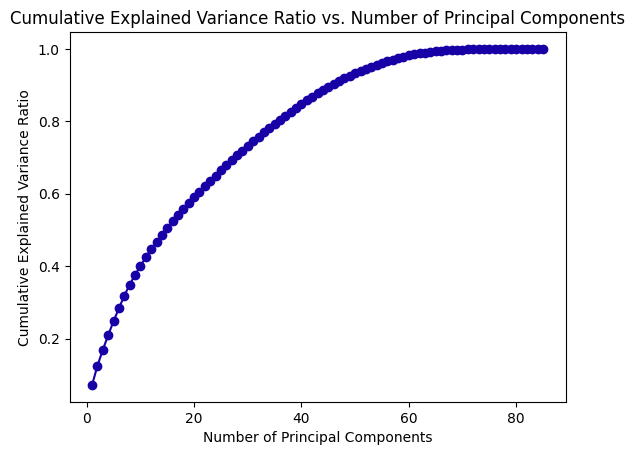

DataFrame with Principal Components and Target Variable:
           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.287336 -0.778230  0.352823  1.196416 -0.782843 -1.636846  0.288315   
1     0.234803 -2.744770  0.529632  3.058888 -0.899296 -0.246007  0.129185   
2    -0.330354  2.332816  0.407304 -1.070332 -0.355783 -1.727691  0.319652   
3     0.369203 -1.493379  0.028312  1.863714 -1.069961 -1.541257  0.303034   
4     3.709072 -1.115563 -0.262500 -1.027475 -2.111368 -2.151732 -2.221573   
...        ...       ...       ...       ...       ...       ...       ...   
1600       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1601       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1602       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1603       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1604       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

      

In [180]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.dropna())  # Standardize after handling missing values

# Create and fit the PCA model
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
cumulative_variance_ratio = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.show()

# Choose the number of components based on the explained variance
n_components = 50  # Reduce features to 50
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
columns = [f'PC{i}' for i in range(1, n_components + 1)]
df_pca = pd.DataFrame(data=X_pca, columns=columns)

# Concatenate the principal components with the target variable
df_final = pd.concat([df_pca, y], axis=1)

# Display the DataFrame with principal components and the target variable
print("DataFrame with Principal Components and Target Variable:")
print(df_final)


In [187]:
df_final

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.287336 -0.778230  0.352823  1.196416 -0.782843 -1.636846  0.288315   
1     0.234803 -2.744770  0.529632  3.058888 -0.899296 -0.246007  0.129185   
2    -0.330354  2.332816  0.407304 -1.070332 -0.355783 -1.727691  0.319652   
3     0.369203 -1.493379  0.028312  1.863714 -1.069961 -1.541257  0.303034   
4     3.709072 -1.115563 -0.262500 -1.027475 -2.111368 -2.151732 -2.221573   
...        ...       ...       ...       ...       ...       ...       ...   
1600       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1601       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1602       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1603       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1604       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0    -0.770651 -0.037471 -0.202042 -0.318704  0.173931  0.262380  0.281383   
1    -1.236451  5.159375 -2.833104  1.327300 -1.643937 -0.218398 -0.126294   
2    -0.017224  0.823389 -0.640391  0.020201 -0.446952  0.531341 -0.162546   
3    -0.760364 -0.638095  0.122467 -0.343782  0.255876  0.196048 -0.051002   
4    -0.255990  0.346756  0.171598 -0.583991  0.309526 -1.018039  0.512756   
...        ...       ...       ...       ...       ...       ...       ...   
1600       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1601       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1602       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1603       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1604       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0     1.568121 -1.334603  0.542516 -0.734673 -0.078948  0.519450 -1.859970   
1     1.409648 -1.633937 -0.040471 -1.482288  0.088893  1.491430  0.179676   
2     1.512431 -1.736527  0.304412 -1.105646 -0.712420  0.707902 -1.404648   
3     1.415724 -1.418273  0.397550 -0.963643  0.162185  1.192250 -1.141964   
4     2.040252 -2.160397  1.348360 -0.791307  0.430349 -1.205392 -3.516419   
...        ...       ...       ...       ...       ...       ...       ...   
1600       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1601       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1602       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1603       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1604       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0     0.646842  0.009878  1.981162  1.649938  0.973965  1.347314  1.071009   
1    -0.915772 -0.313031  0.534100  1.316482  1.682973  1.342596  1.133742   
2    -0.296694 -1.550414  0.349799  1.577803  1.726302  1.729897  0.852653   
3     0.156164  0.405418  2.345357  1.767075  0.909540  1.074345  0.975040   
4    -4.222417 -1.805957  4.692774  0.013576  2.687493  0.557201  2.260919   
...        ...       ...       ...       ...       ...       ...       ...   
1600       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1601       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1602       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1603       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1604       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0    -0.025997 -0.709235 -0.599335 -0.463457 -1.044968  0.354317  0.471040   
1    -0.548480 -1.501556  0.411174 -0.593987 -0.309136  0.118562  0.876487   
2    -0.404441 -0.625468 -1.1

In [181]:
# checking NAn values after PCA
nan_values = df_final.isna().sum()

# Display columns with NaN values and their counts
print("Columns with NaN values and their counts:")
print(nan_values[nan_values > 0])

# Check if there are any NaN values in the entire dataset
if df.isna().values.any():
    print("Dataset contains NaN values.")
else:
    print("No NaN values found in the dataset.")


Columns with NaN values and their counts:
PC1     5
PC2     5
PC3     5
PC4     5
PC5     5
PC6     5
PC7     5
PC8     5
PC9     5
PC10    5
PC11    5
PC12    5
PC13    5
PC14    5
PC15    5
PC16    5
PC17    5
PC18    5
PC19    5
PC20    5
PC21    5
PC22    5
PC23    5
PC24    5
PC25    5
PC26    5
PC27    5
PC28    5
PC29    5
PC30    5
PC31    5
PC32    5
PC33    5
PC34    5
PC35    5
PC36    5
PC37    5
PC38    5
PC39    5
PC40    5
PC41    5
PC42    5
PC43    5
PC44    5
PC45    5
PC46    5
PC47    5
PC48    5
PC49    5
PC50    5
ICU     5
dtype: int64
No NaN values found in the dataset.


In [ ]:
df.head(20)

In [ ]:
I

# AIF360

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.explainers import MetricTextExplainer
from aif360.metrics import ClassificationMetric
from aif360.explainers import MetricTextExplainer
from aif360.algorithms.preprocessing import Reweighing
from sklearn.linear_model import LogisticRegression

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

In [ ]:
from aif360.datasets import BinaryLabelDataset

# Assuming 'GENDER' is the sensitive attribute
sensitive_attribute = 'GENDER'

# Assuming 'ICU' is the binary label
label_column = 'ICU'

# Create the BinaryLabelDataset
bld = BinaryLabelDataset(
    df=df,
    label_names=[label_column],
    protected_attribute_names=[sensitive_attribute],
    favorable_label=0,  # Assuming 0 means survival
    unfavorable_label=1,
)

# Define privileged and unprivileged groups based on sensitive attribute values
privileged_group = [{sensitive_attribute: val} for val in bld.privileged_protected_attributes[0]]
unprivileged_group = [{sensitive_attribute: val} for val in bld.unprivileged_protected_attributes[0]]

# Ensure there's no overlap between privileged and unprivileged groups
if set(privileged_group[0].values()) & set(unprivileged_group[0].values()):
    raise ValueError("Privileged and unprivileged groups should not share any common elements in the sensitive attribute.")

# Assign the privileged and unprivileged groups
bld.privileged_protected_attributes = privileged_group
bld.unprivileged_protected_attributes = unprivileged_group


In [ ]:
labels = ['Original Training Set', 'Transformed Training Set']
values = [metric_orig_train.disparate_impact(), metric_transf_train.disparate_impact()]

# Plotting the results
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'green'])
plt.ylabel('Disparate Impact')
plt.title('Disparate Impact Before and After Preprocessing')
plt.ylim([0, 1.2])  # Adjust the y-axis limit if needed
plt.show()

In [ ]:
# Checking for bias before preprocessing
metric_orig_train = BinaryLabelDatasetMetric(bld, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
print("Original training set - Disparate Impact: {:.3f}".format(metric_orig_train.disparate_impact()))


In [ ]:
# Applying reweighing as an example of preprocessing to mitigate bias
preprocessor = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
train_data_reweighted = preprocessor.fit_transform(bld)


In [ ]:
# Checking for bias after preprocessing
metric_transf_train = BinaryLabelDatasetMetric(train_data_reweighted, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
print("Transformed training set - Disparate Impact: {:.3f}".format(metric_transf_train.disparate_impact()))
